In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns
from earm_exp_parameters import earm_rates

/sw/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/sw/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


kf mito:  -14.8452185818  -  0.154781418154
kr mito:  -4.15478141815  -  13.8452185818
kf cyto:  -16.0001205418  -  -1.00012054183
kr cyto:  -2.99987945817  -  15.0001205418


In [2]:
os.chdir('/Users/Erin/git/accre_data_analysis/from_fitted_3chainprobs/')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+'_sampled_params_chain_0.npy')
    for cont in range(2, 15):
        old = traces[trace]
        traces[trace] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_sampled_params_chain_0.npy')])
    traces[trace] = [traces[trace]]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))
        for cont in range(2, 15):
            old = traces[trace][chain]
            traces[trace][chain] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_sampled_params_chain_'+str(chain)+'.npy')])

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+'_logps_chain_0.npy')
    for cont in range(2, 11):
        old = logps[trace]
        logps[trace] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_logps_chain_0.npy')])
    logps[trace] = [logps[trace]]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        for cont in range(2, 11):
            old = logps[trace][chain]
            logps[trace][chain] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_logps_chain_'+str(chain)+'.npy')])

In [8]:
traces['a'][0].shape

(750000, 105)

In [5]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [10]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [11]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  102  of  105  parameters.
Percent of parameters with GR below 1.1:  97.1428571429


[105, 100.0, 102, 97.14285714285714]

In [12]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [13]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  95  of  105  parameters.
Percent of parameters with GR below 1.2:  90.4761904762
Number of parameters with GR below 1.1:  75  of  105  parameters.
Percent of parameters with GR below 1.1:  71.4285714286


[95, 90.47619047619048, 75, 71.42857142857143]

750000
3
750000


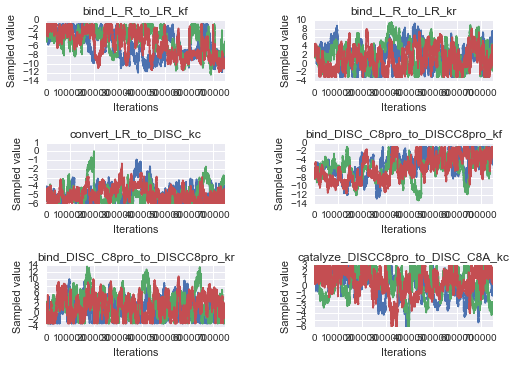

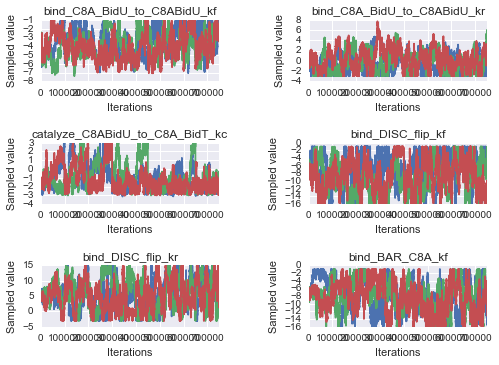

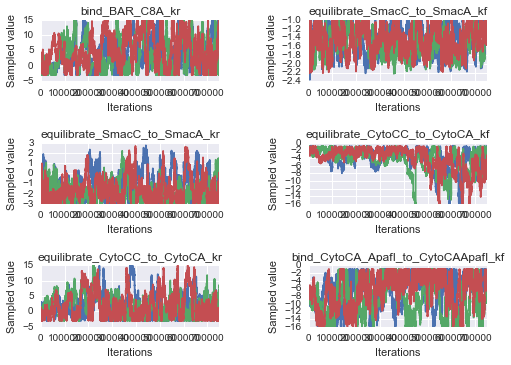

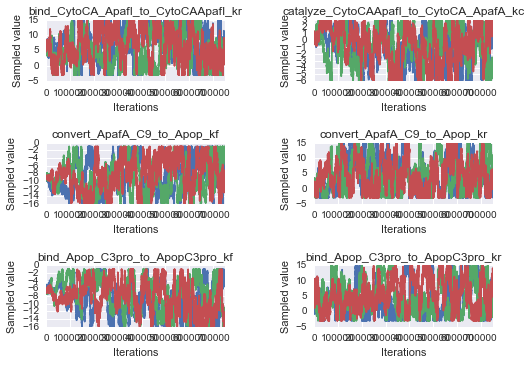

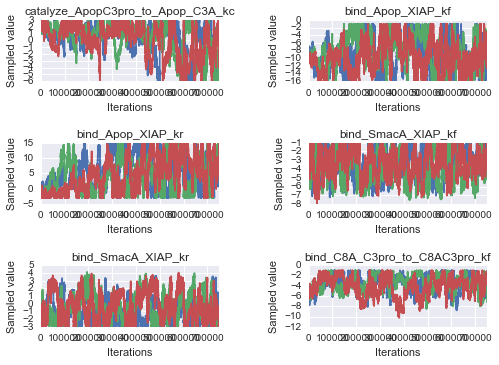

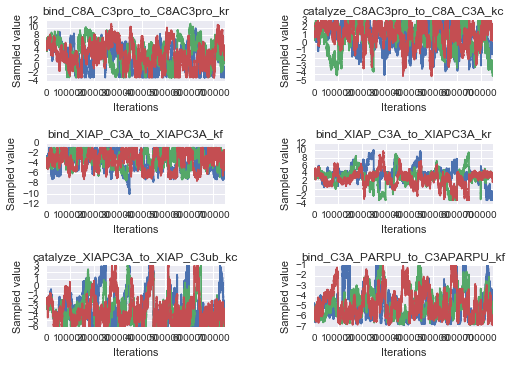

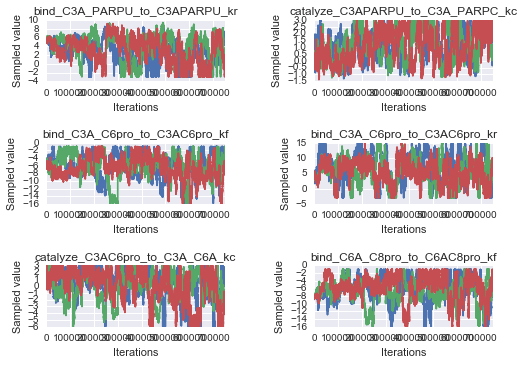

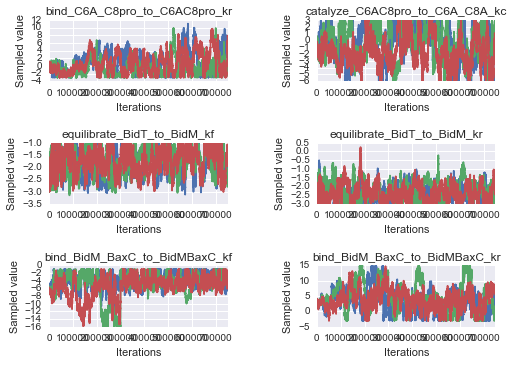

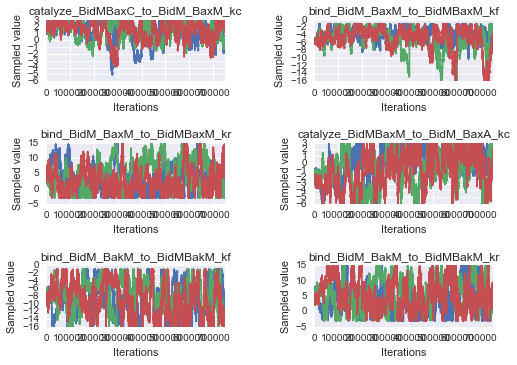

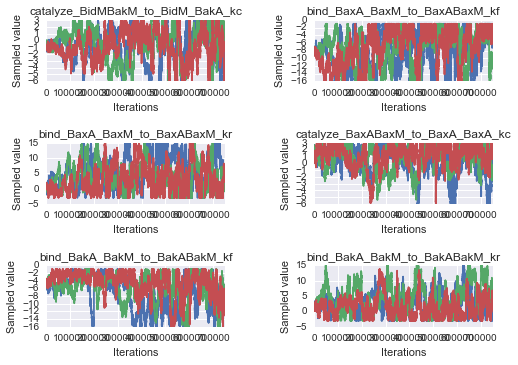

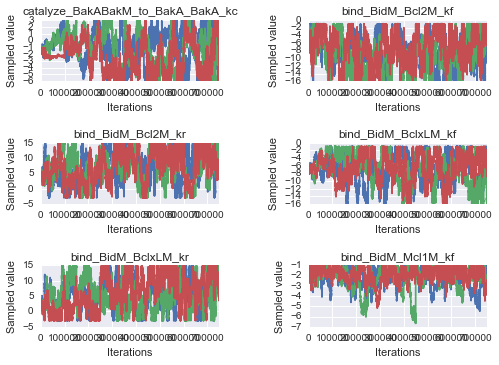

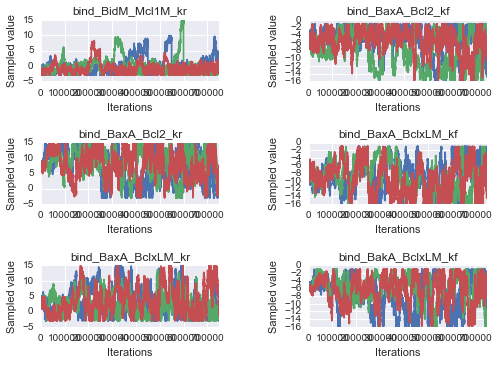

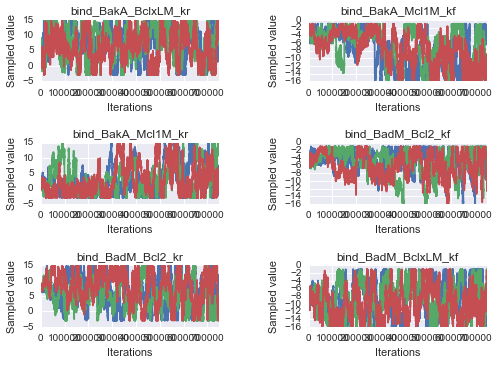

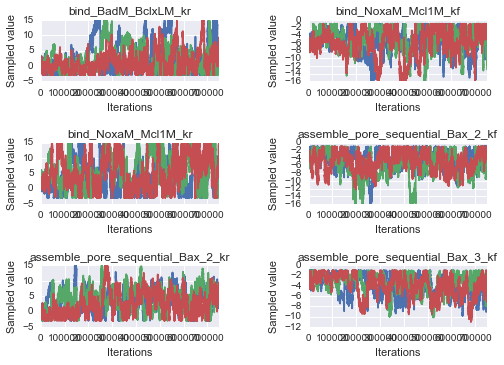

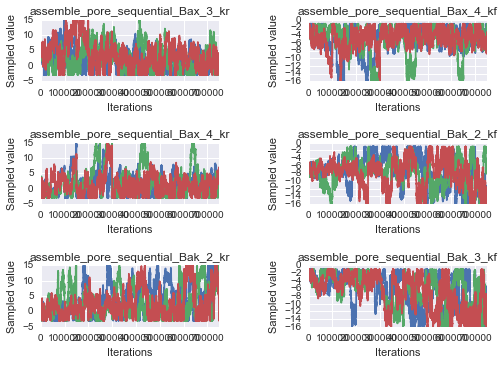

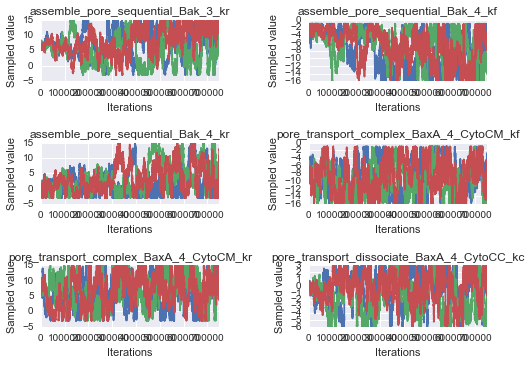

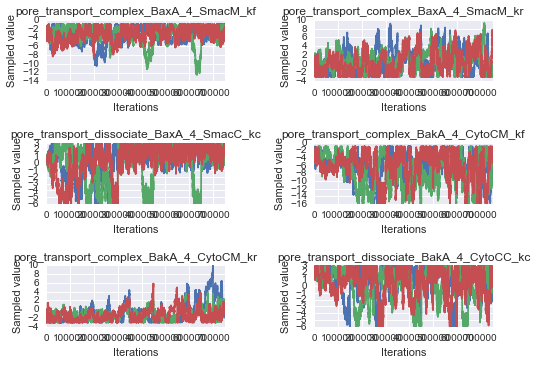

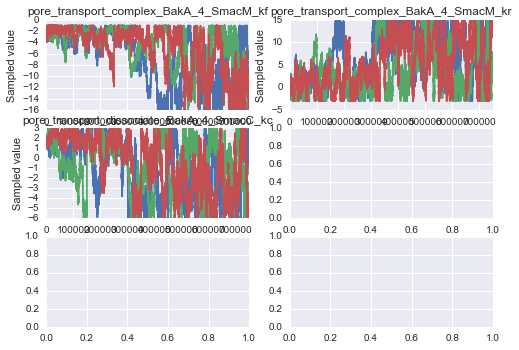

In [14]:
sample_plots(param_trace_dicts['a'])

750000
3
750000


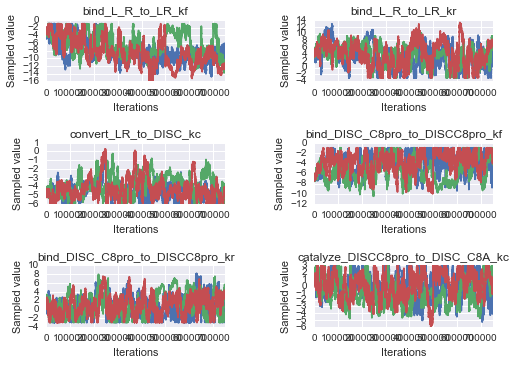

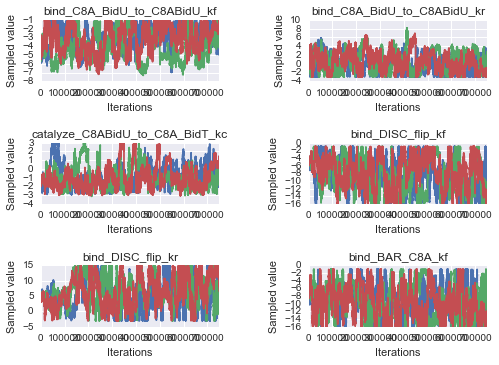

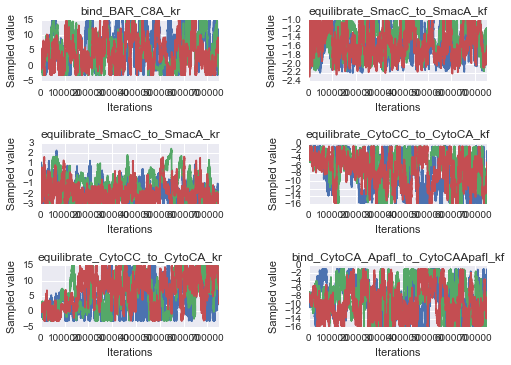

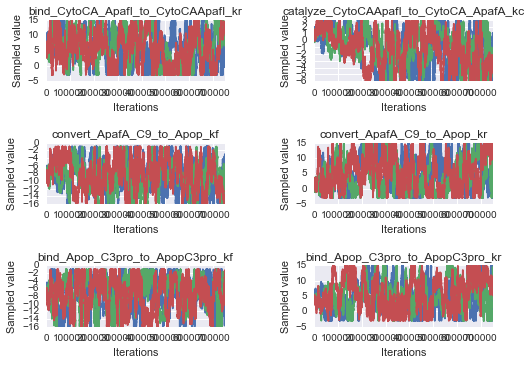

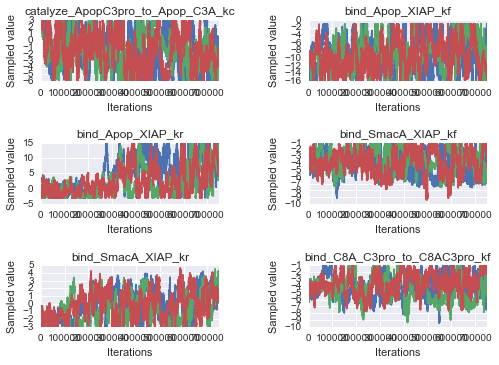

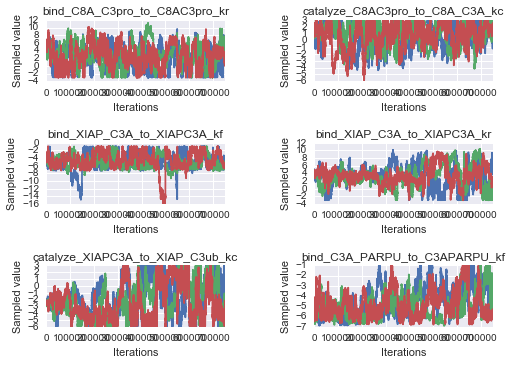

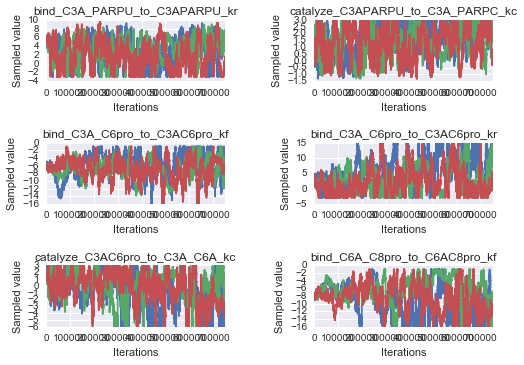

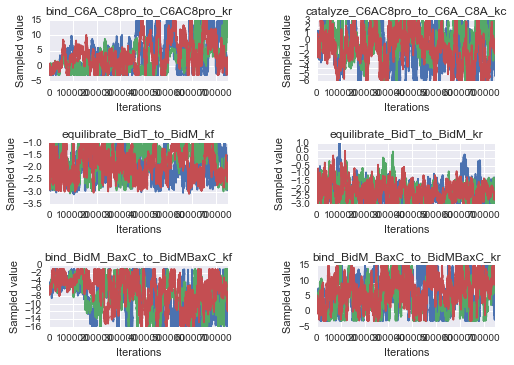

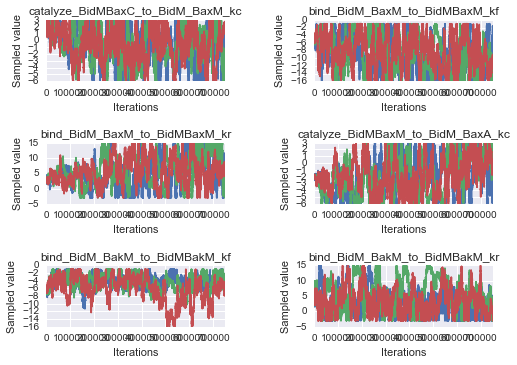

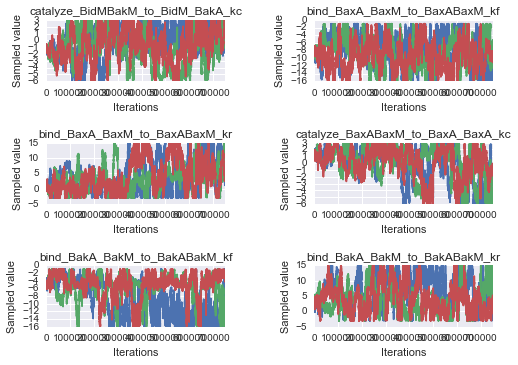

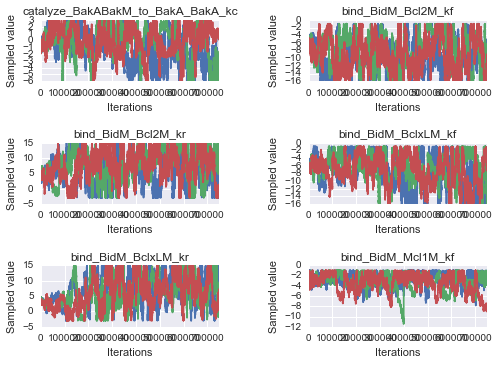

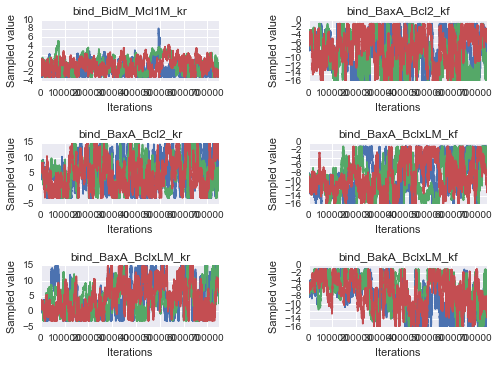

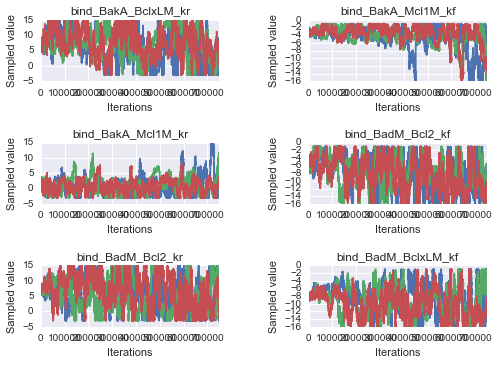

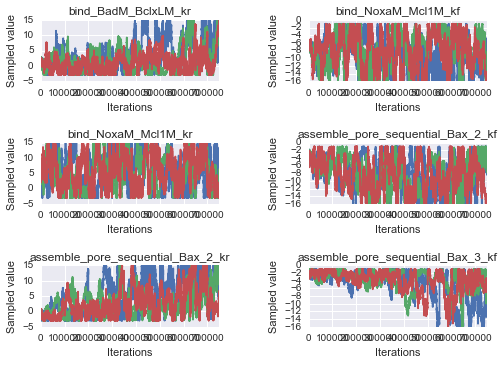

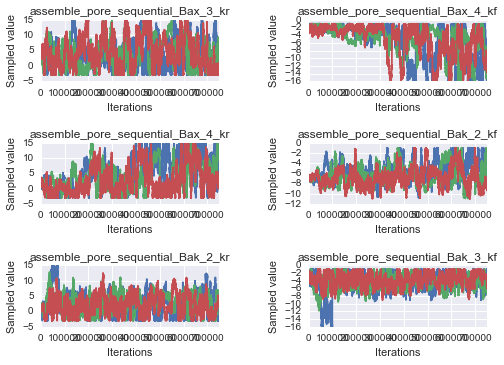

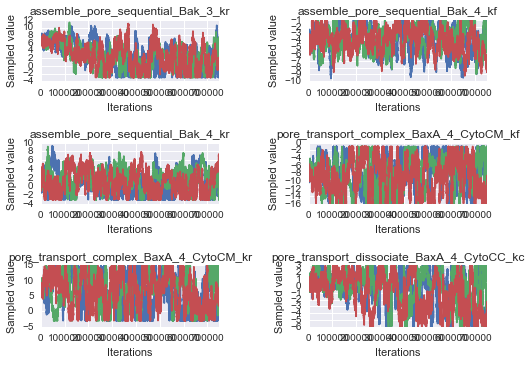

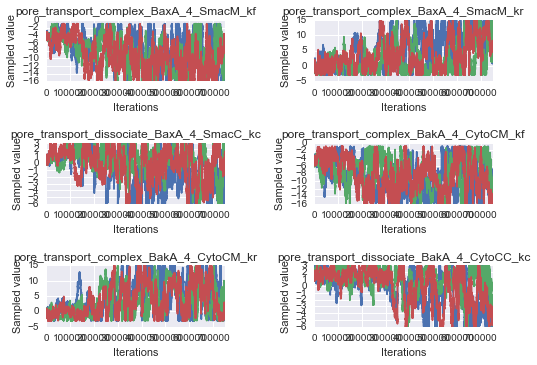

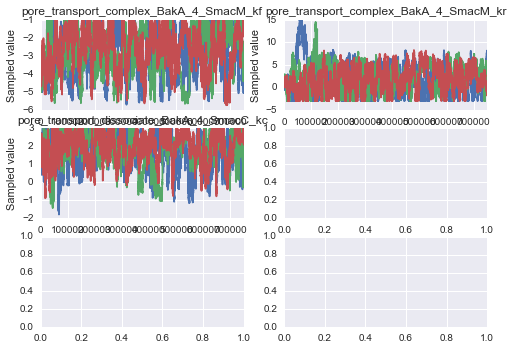

In [16]:
sample_plots(param_trace_dicts['b'])

In [6]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=25000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=25000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=25000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=25000, thin=1)

/sw/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


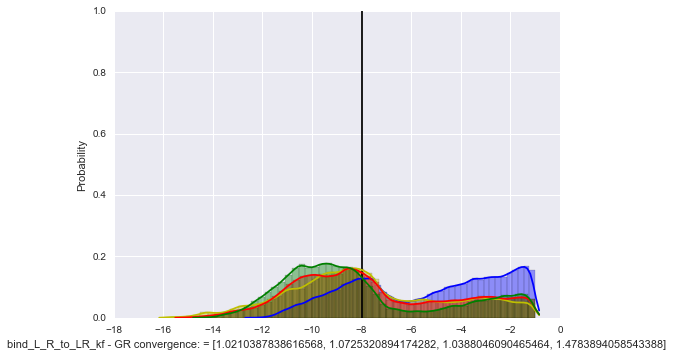

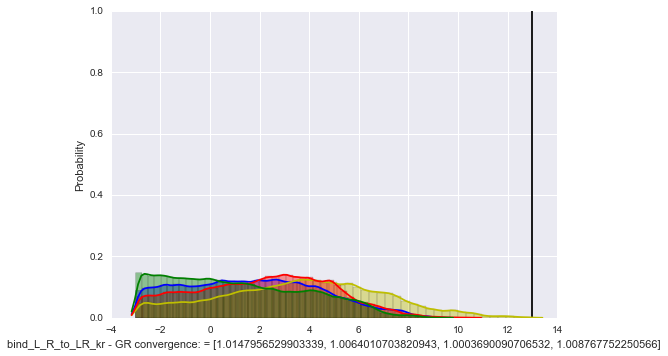

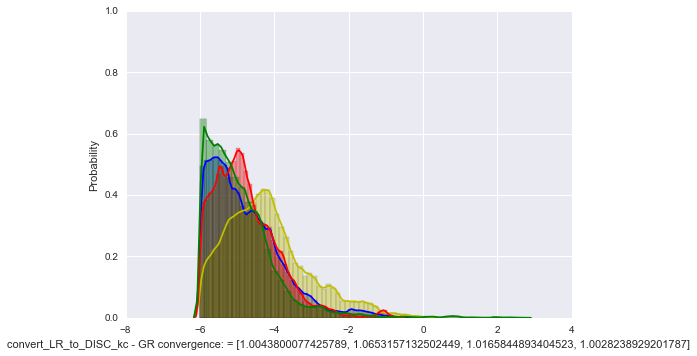

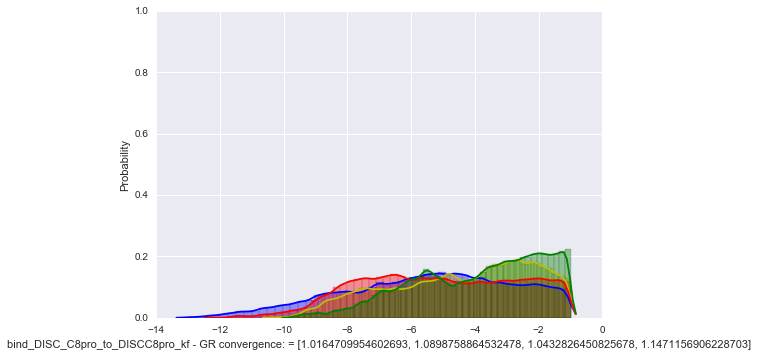

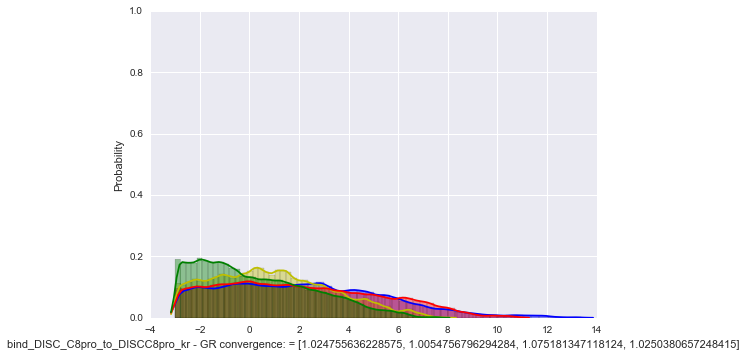

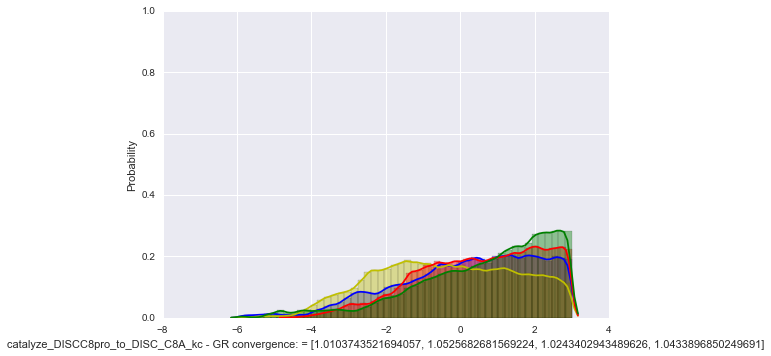

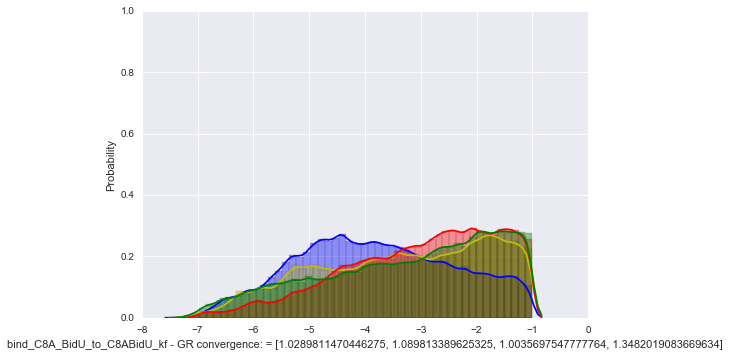

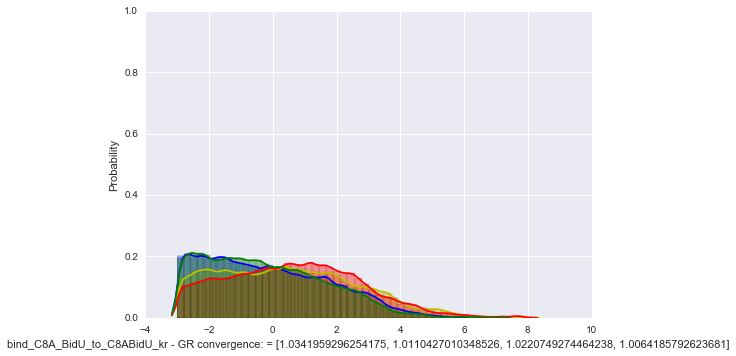

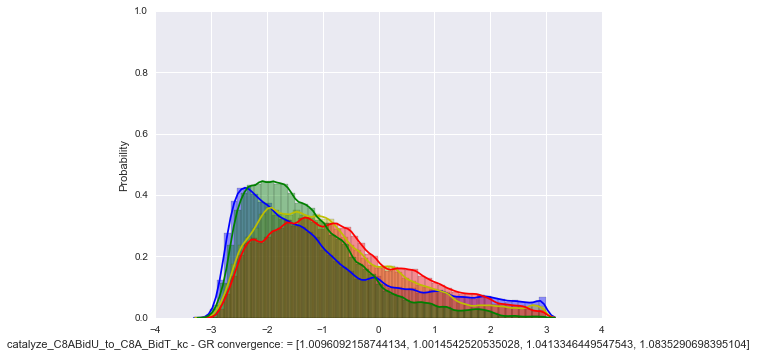

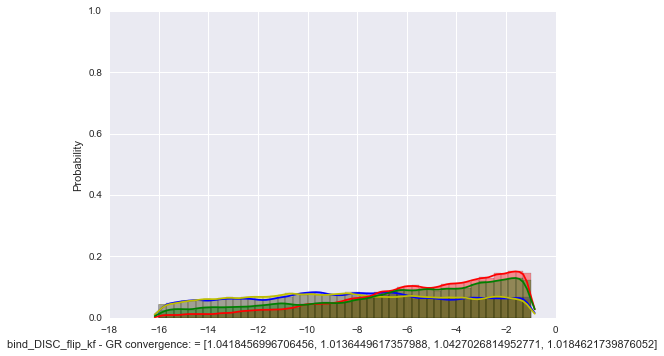

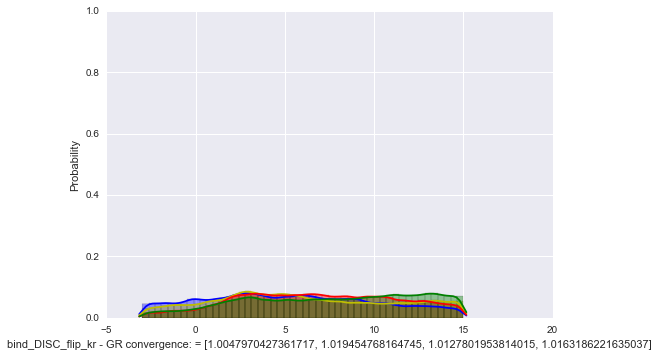

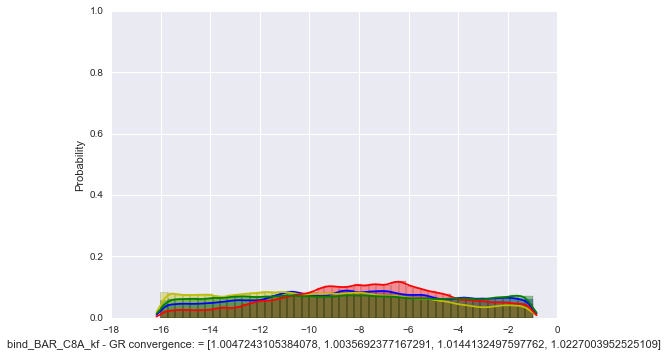

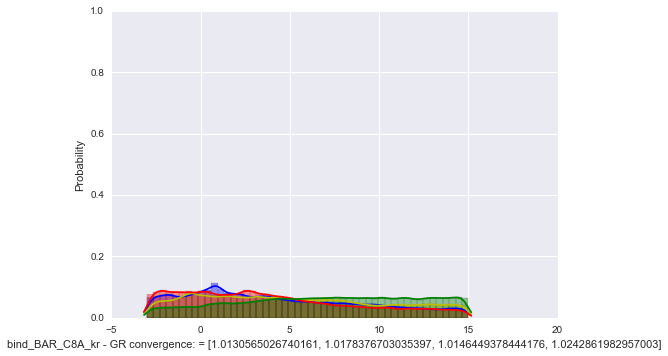

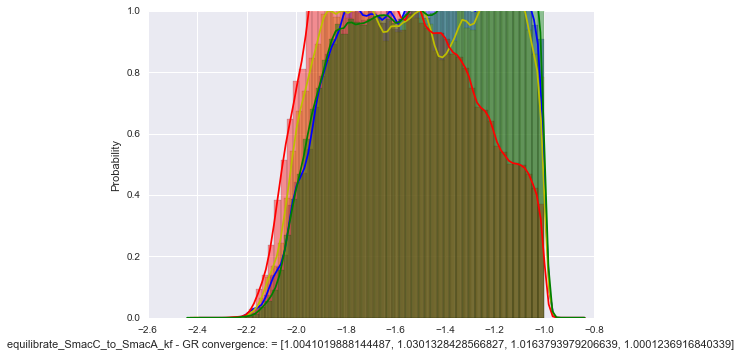

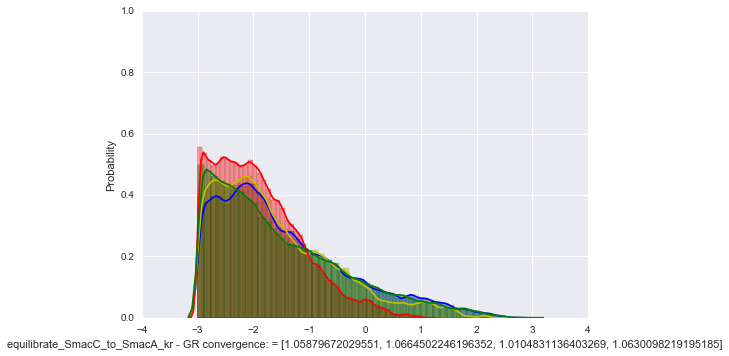

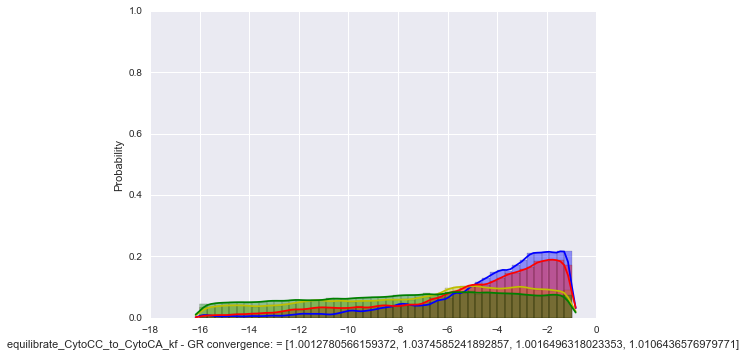

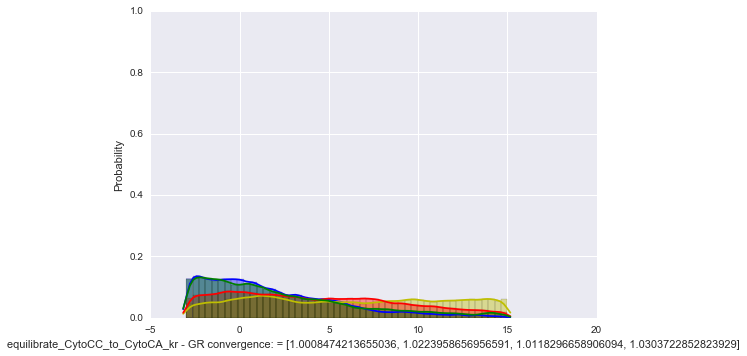

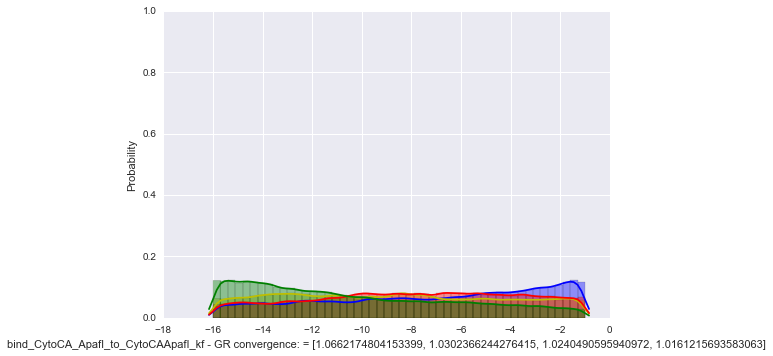

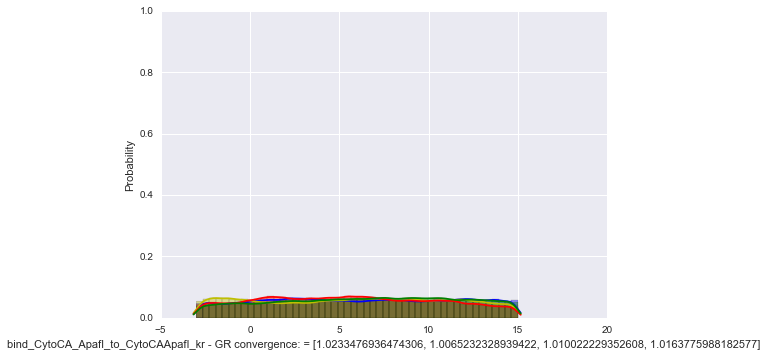

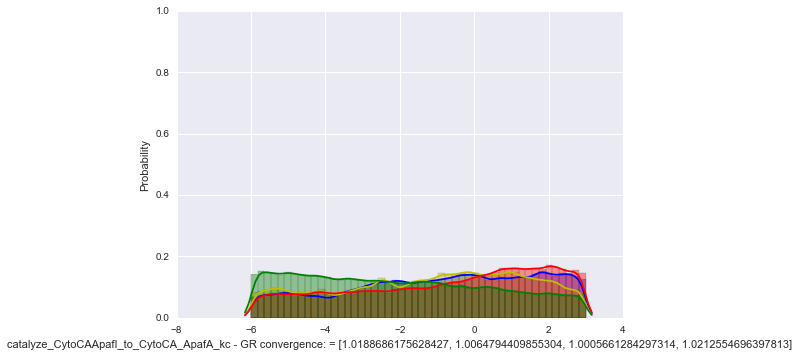

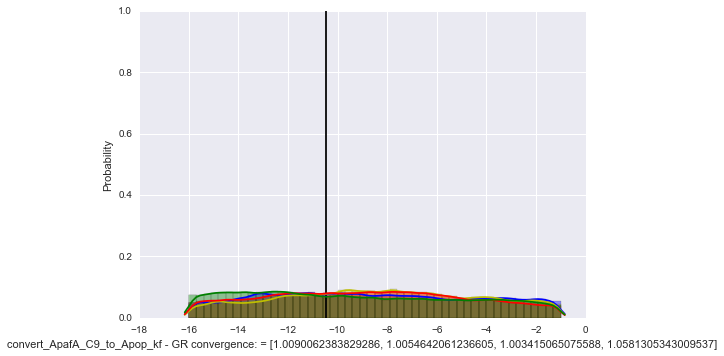

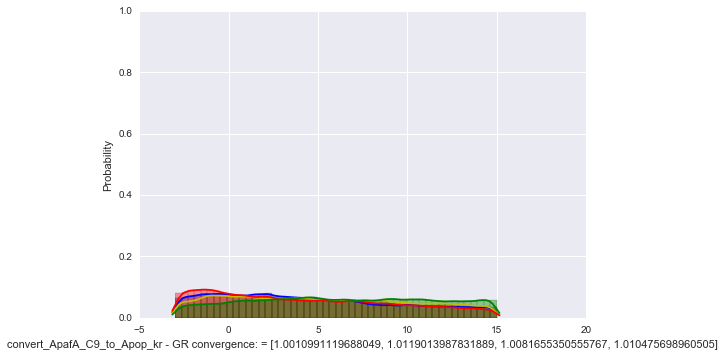

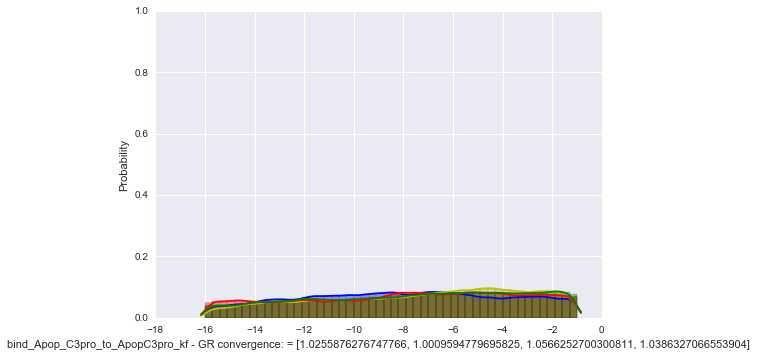

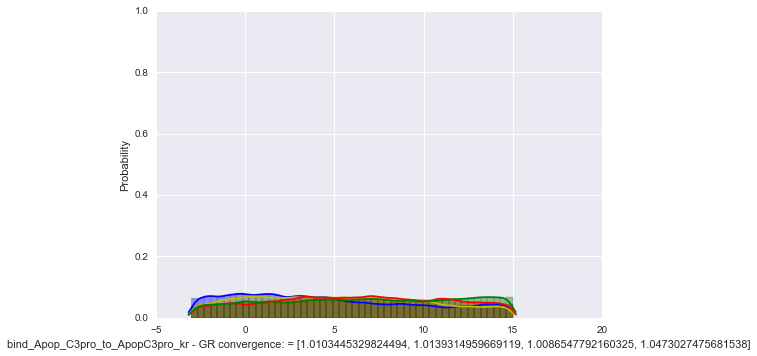

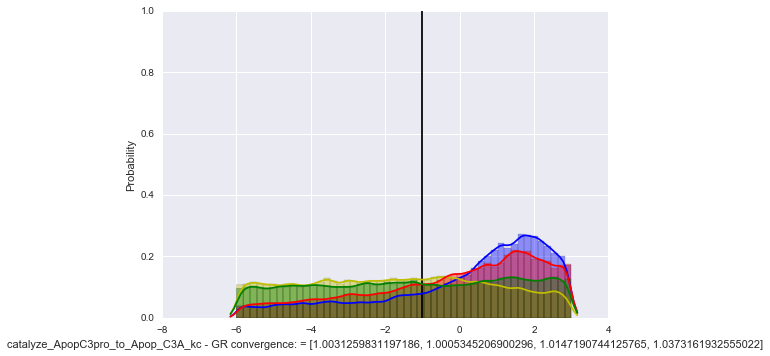

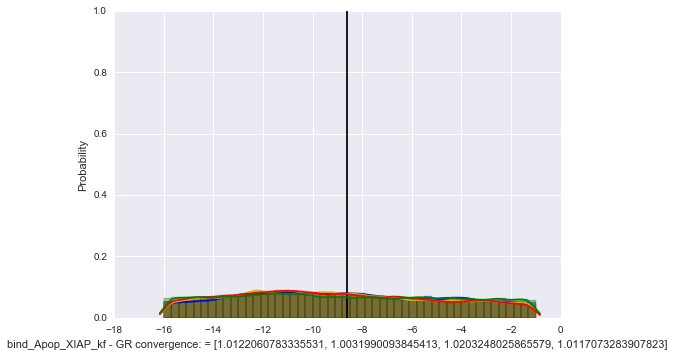

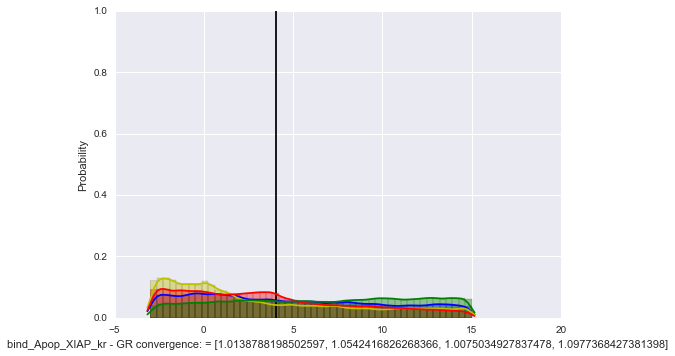

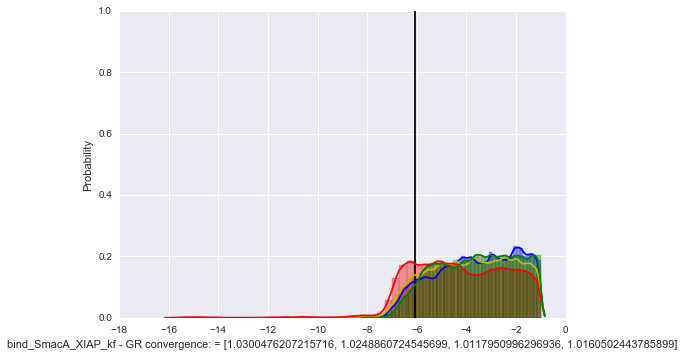

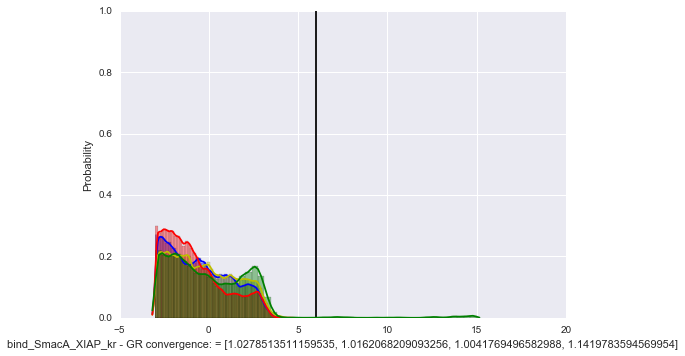

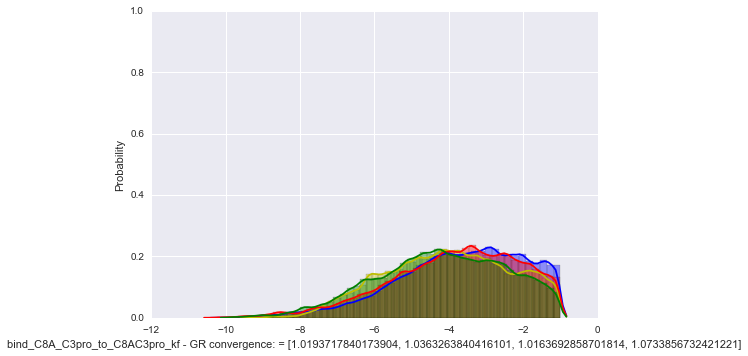

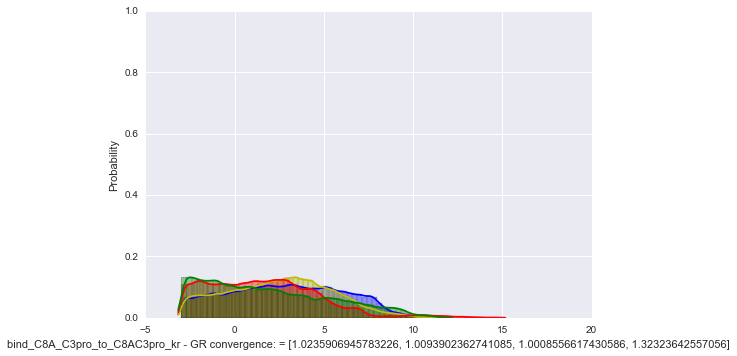

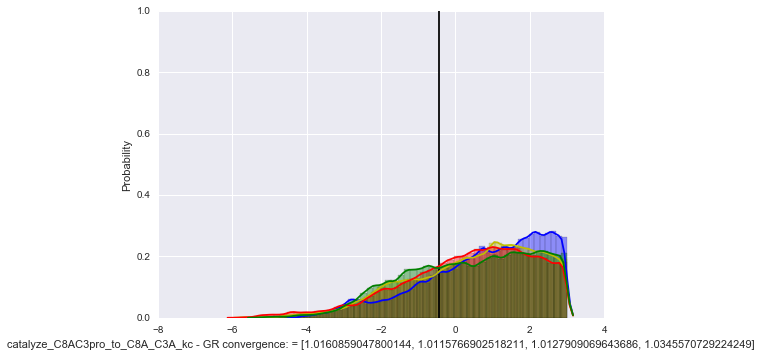

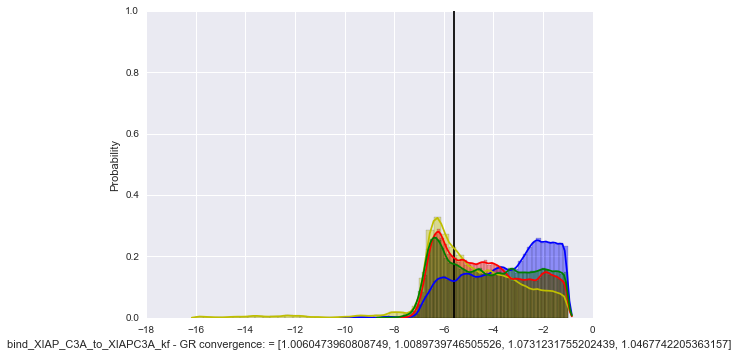

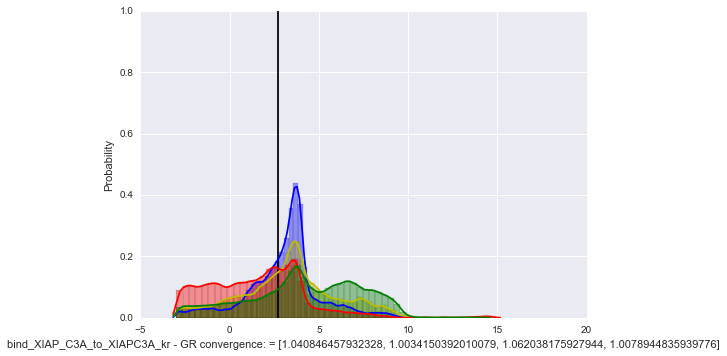

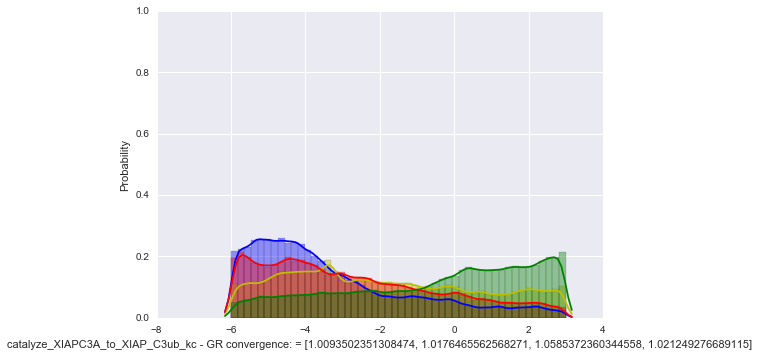

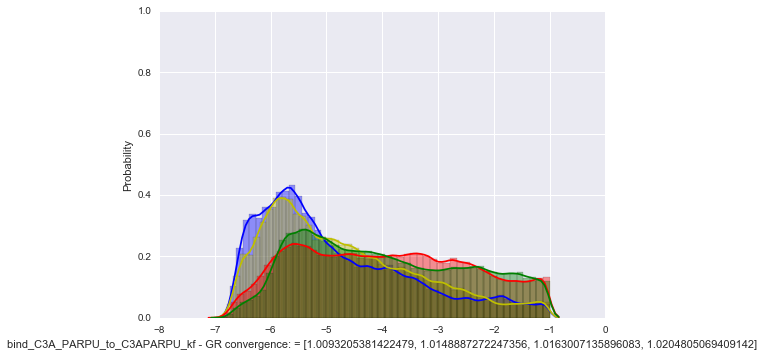

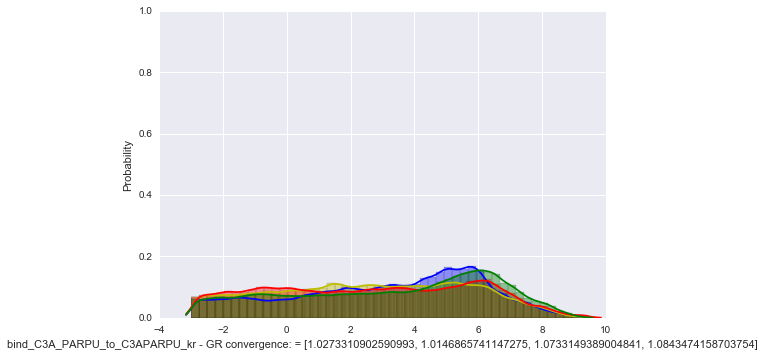

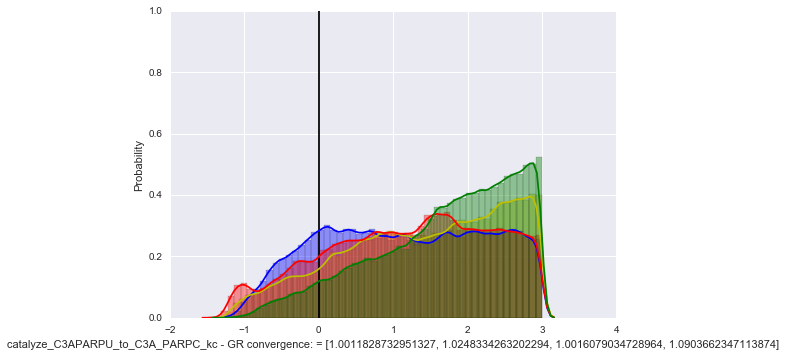

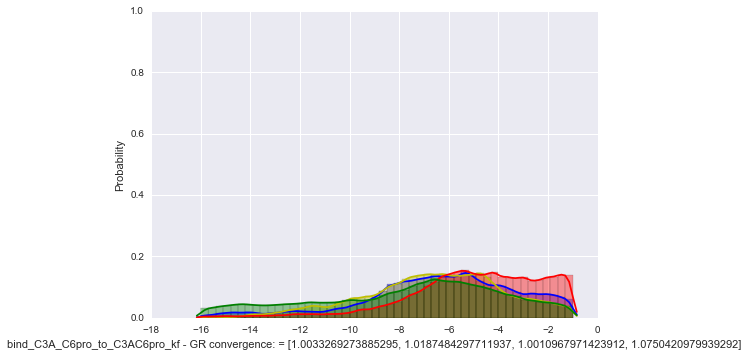

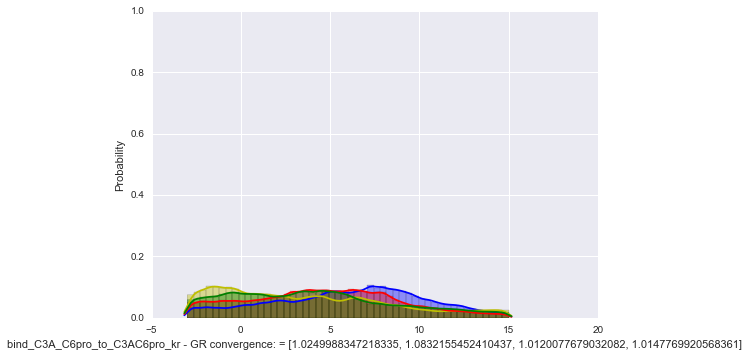

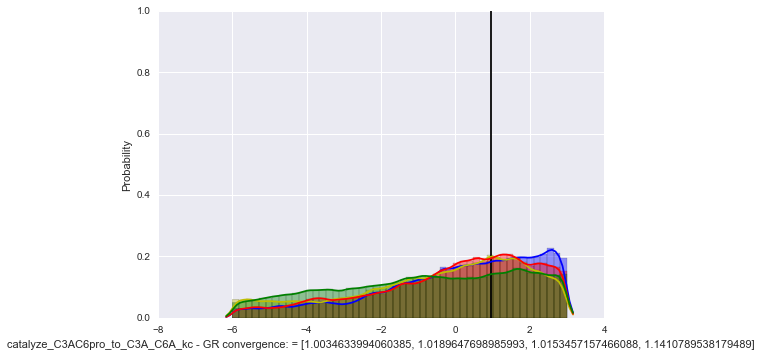

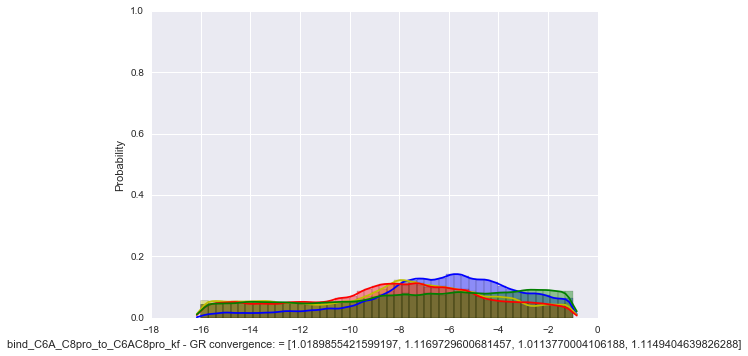

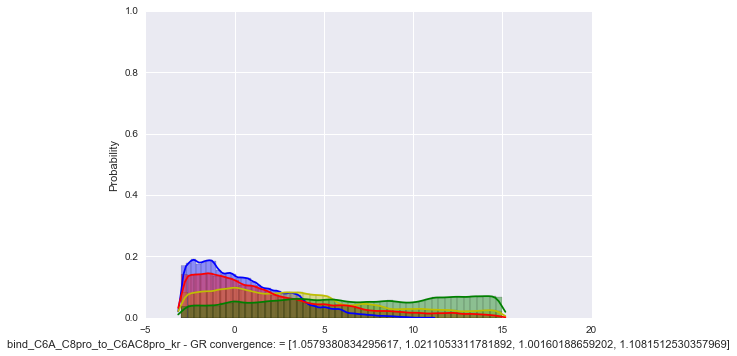

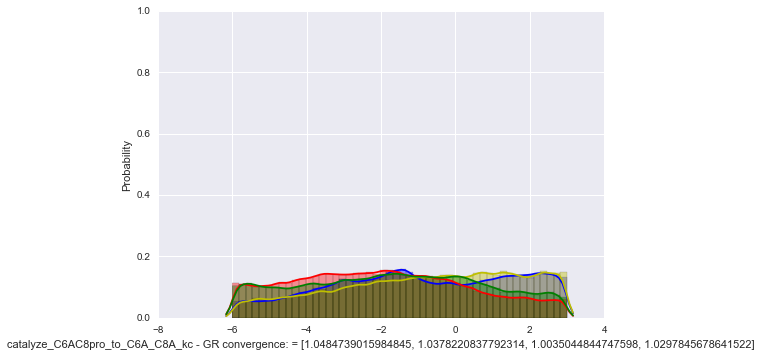

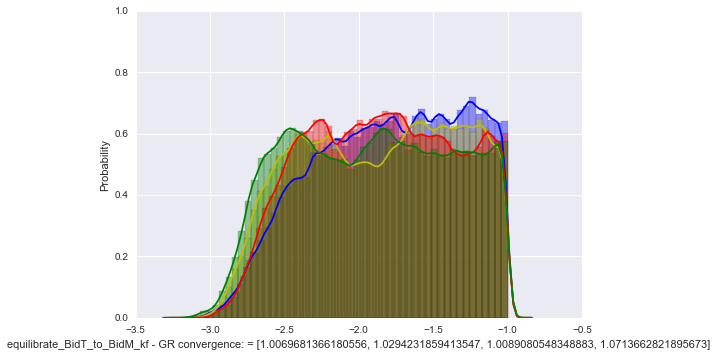

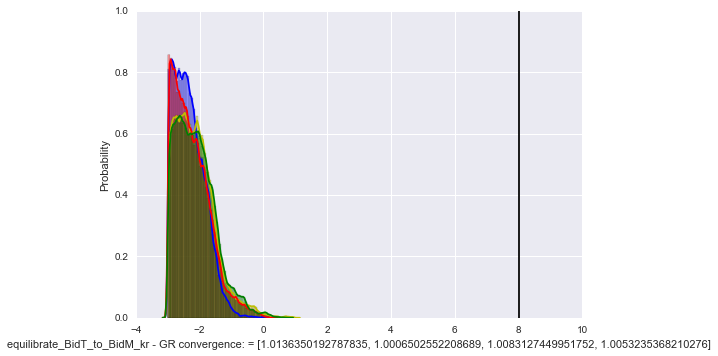

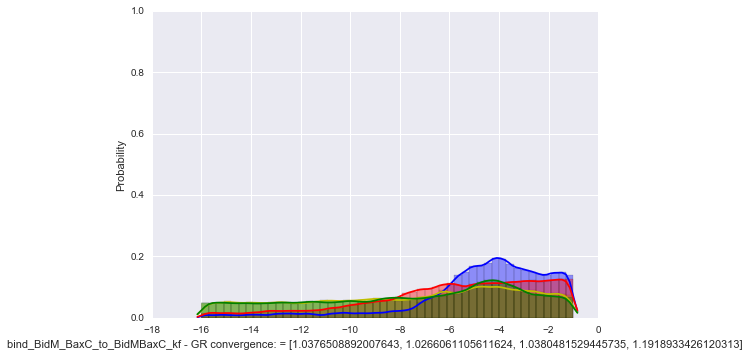

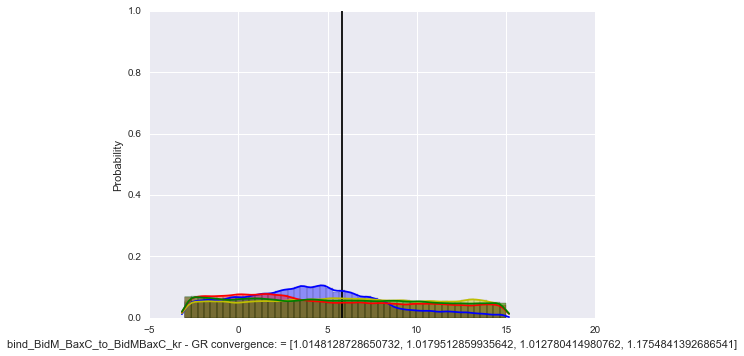

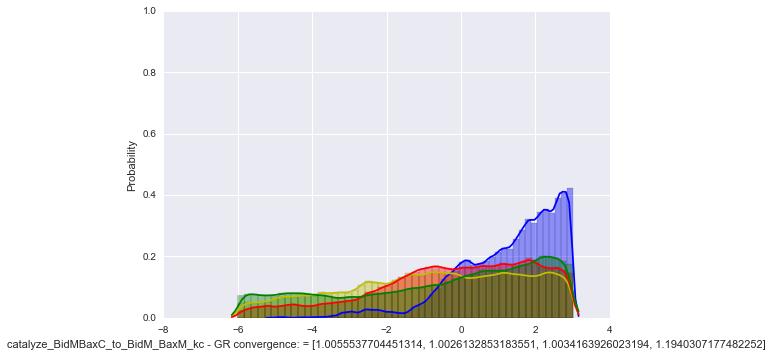

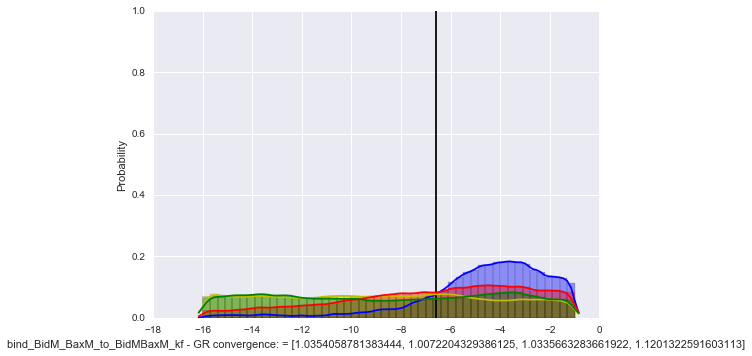

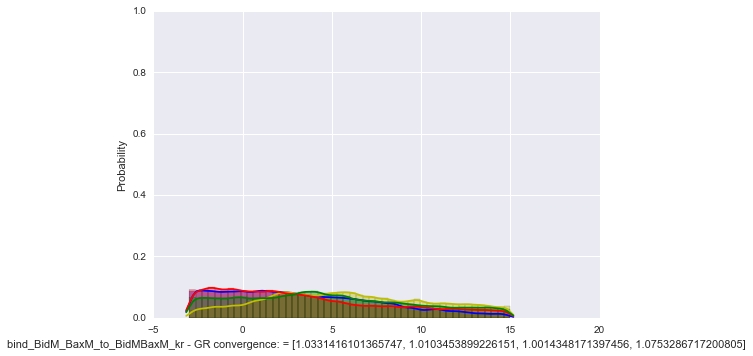

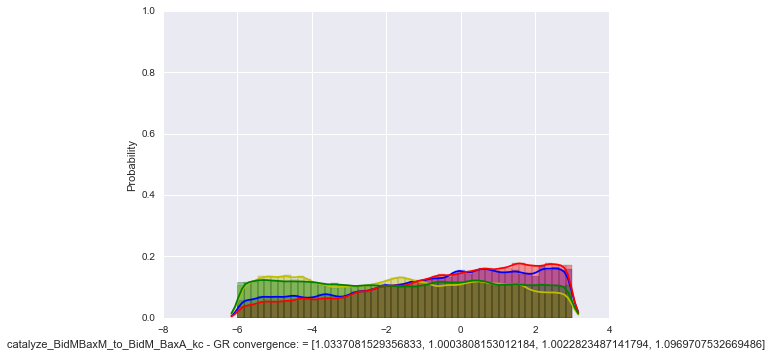

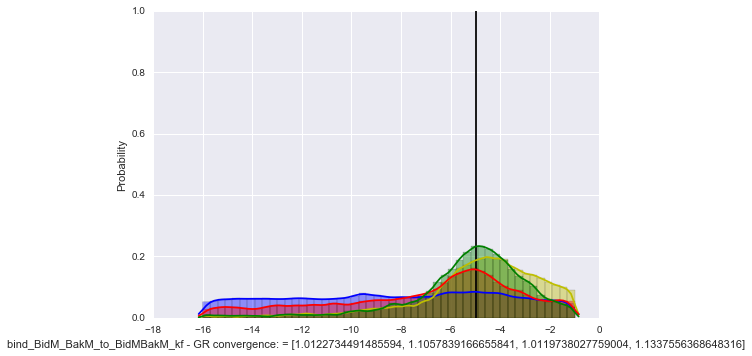

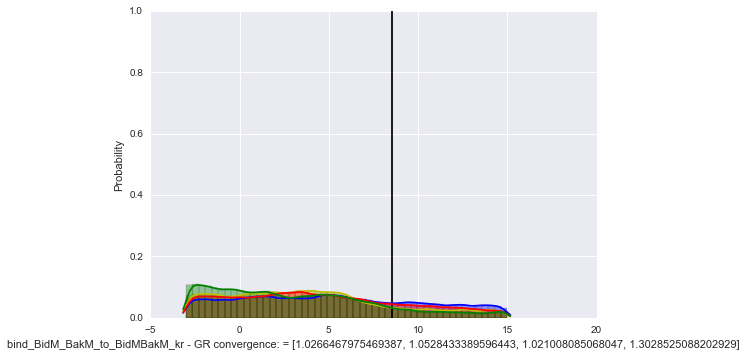

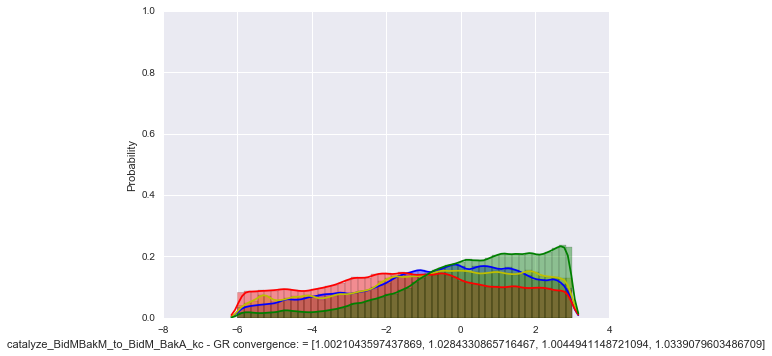

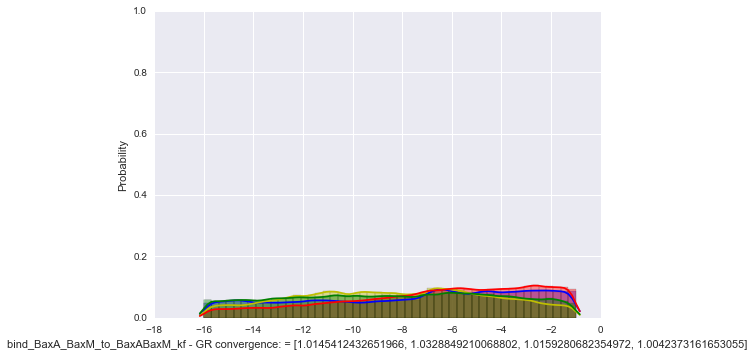

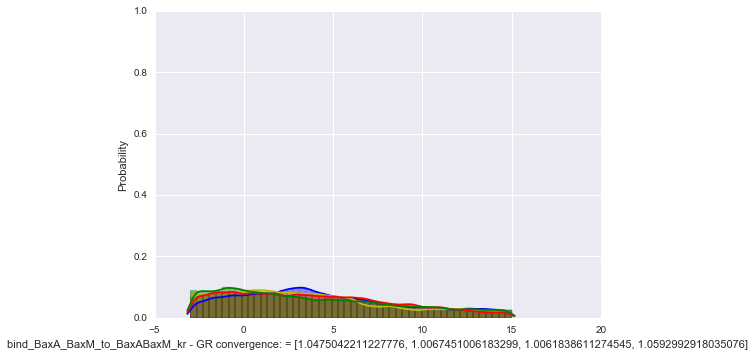

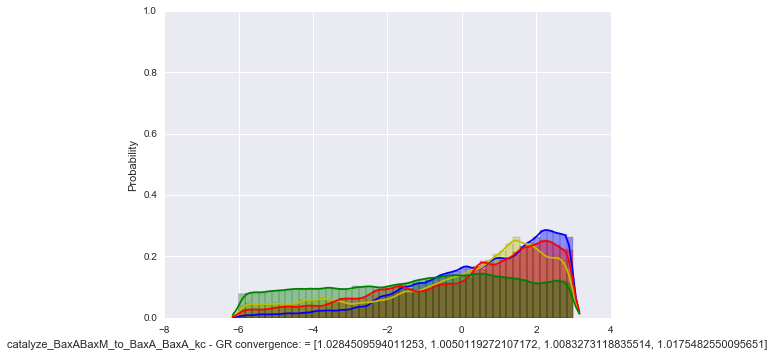

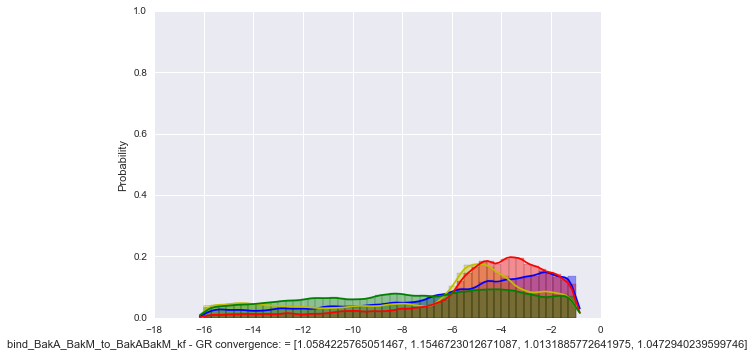

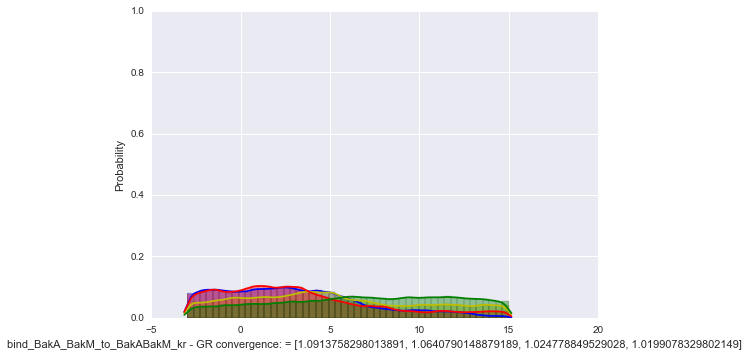

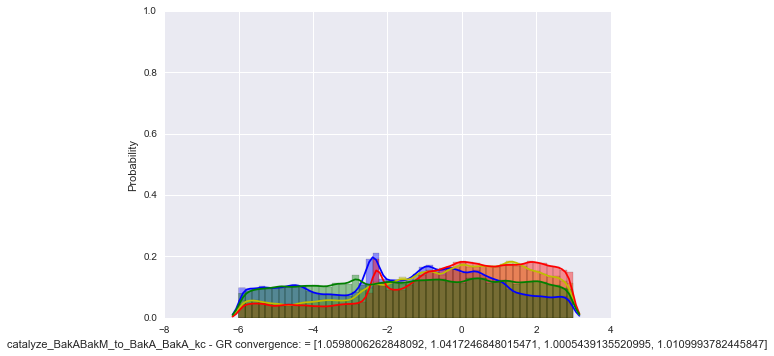

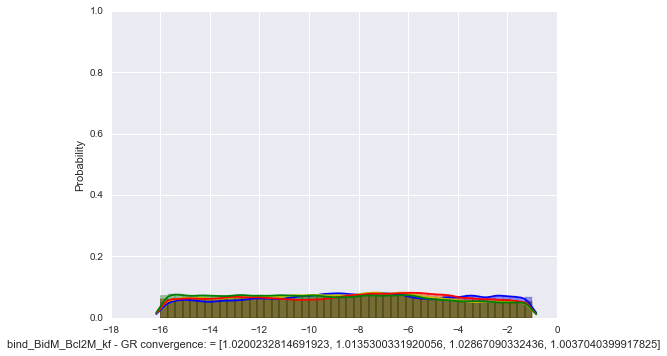

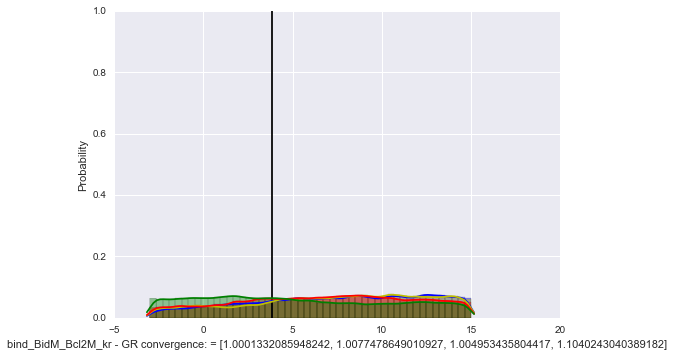

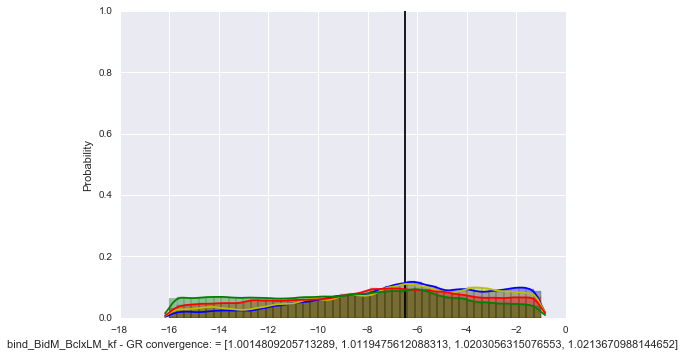

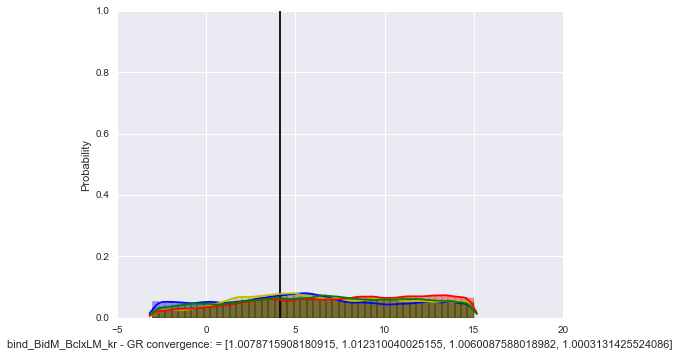

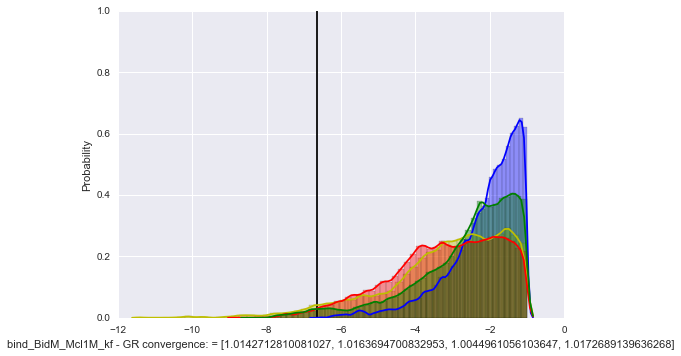

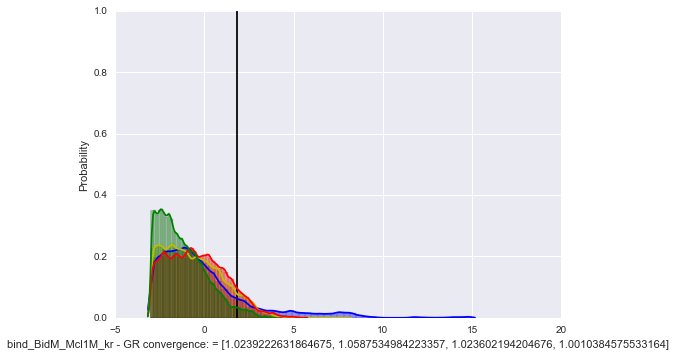

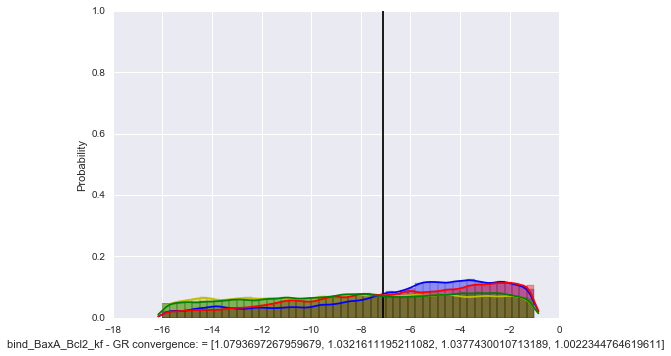

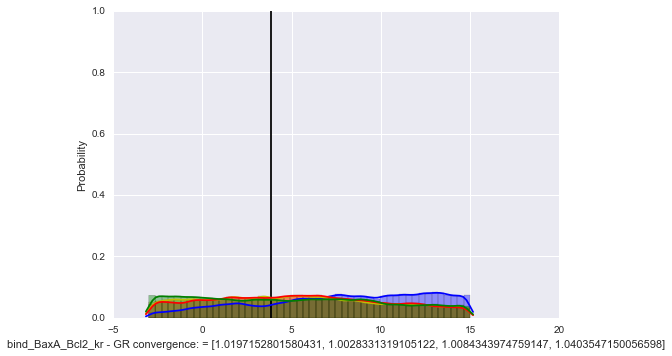

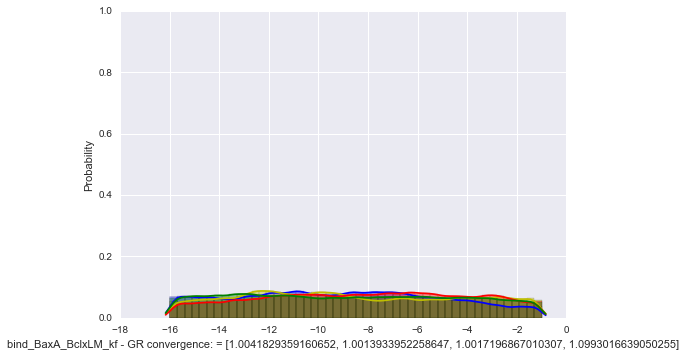

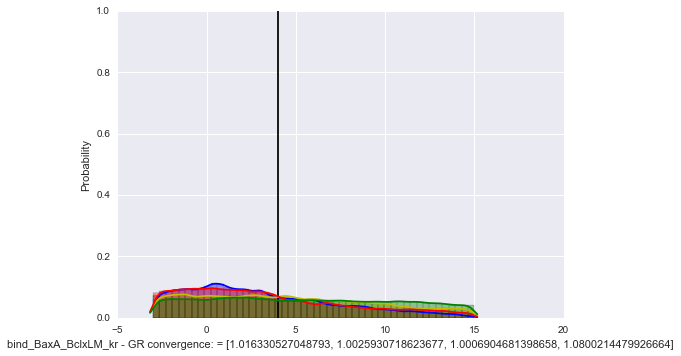

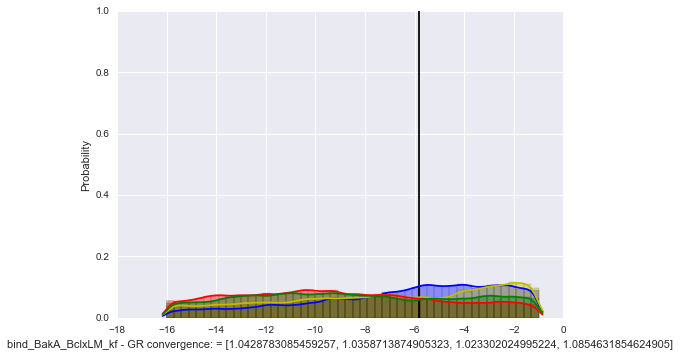

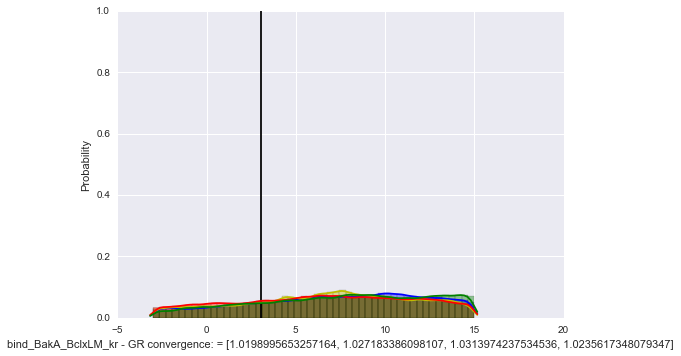

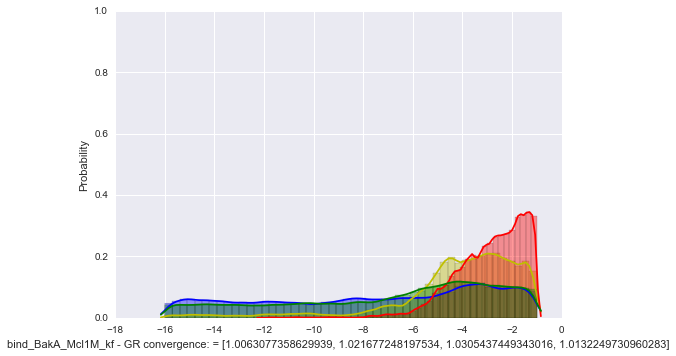

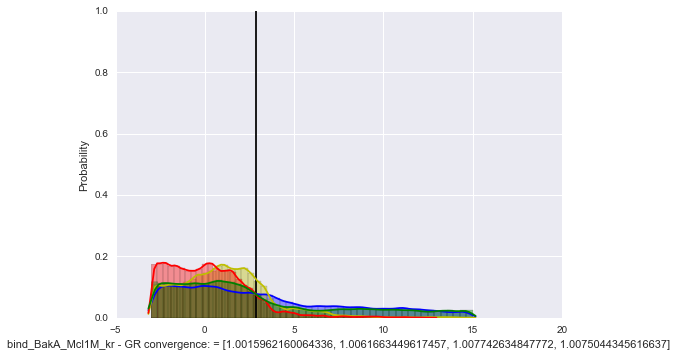

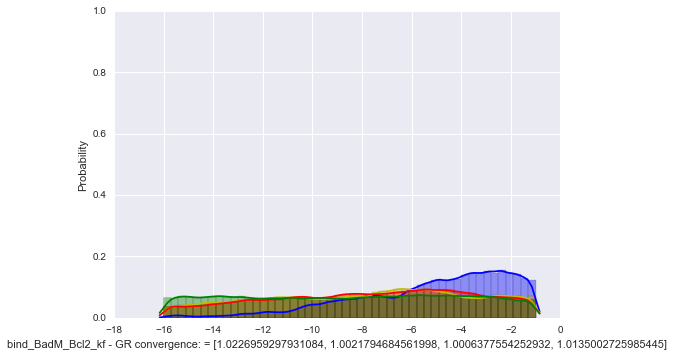

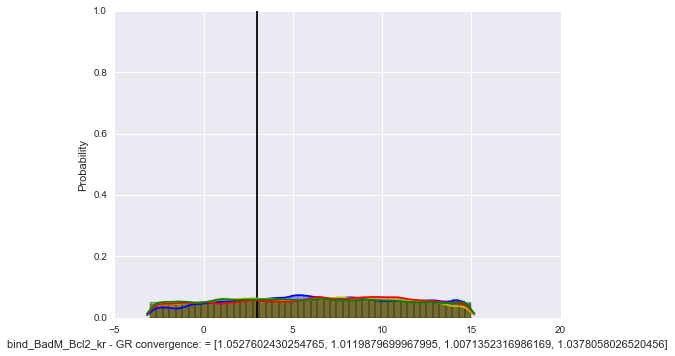

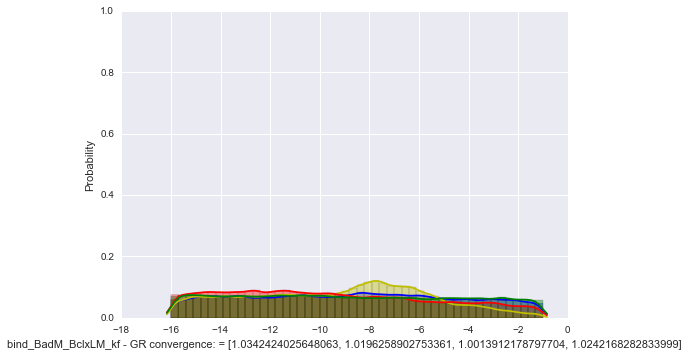

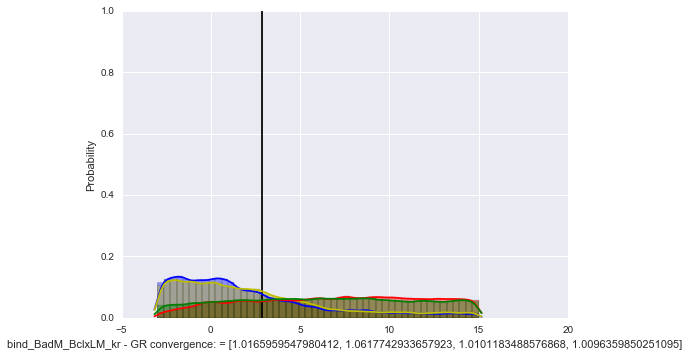

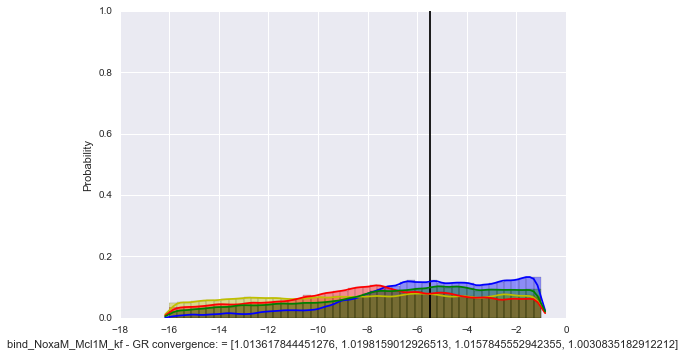

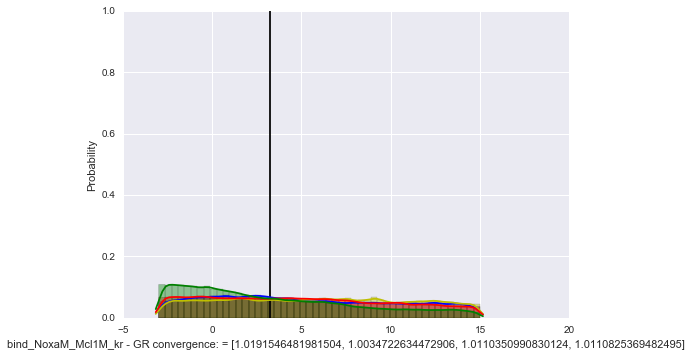

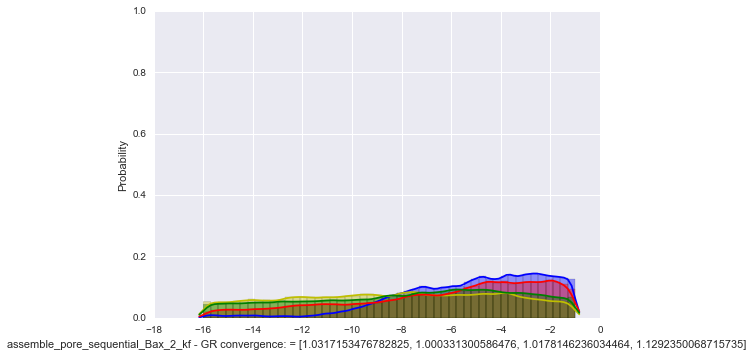

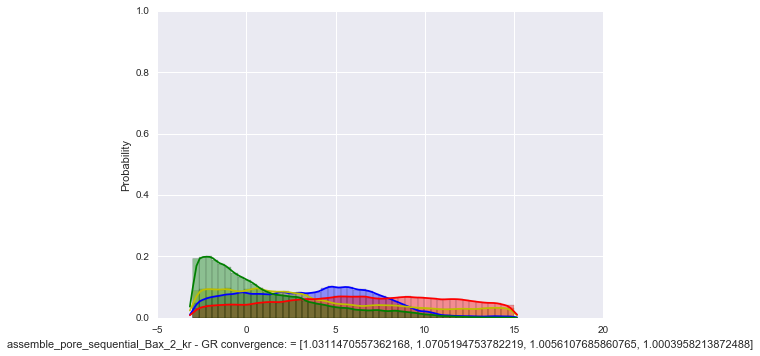

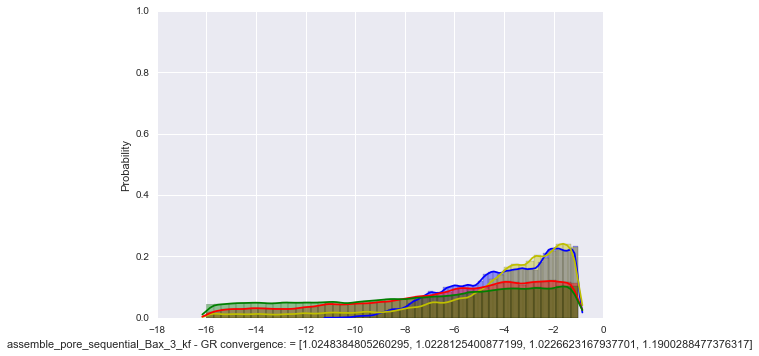

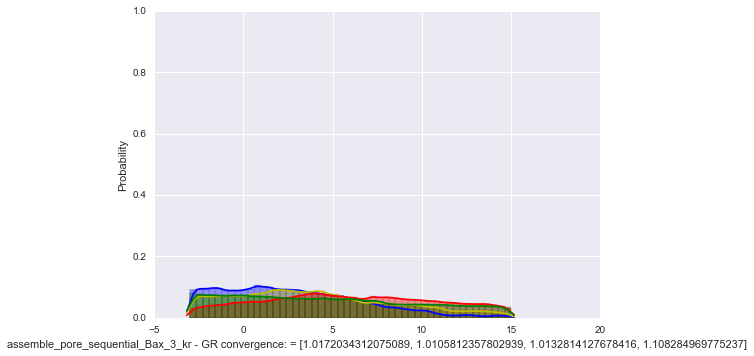

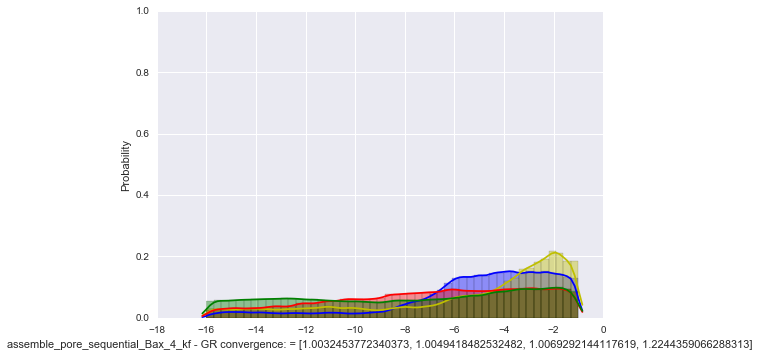

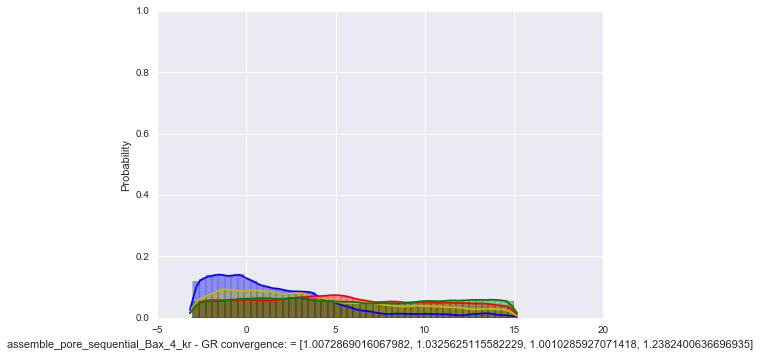

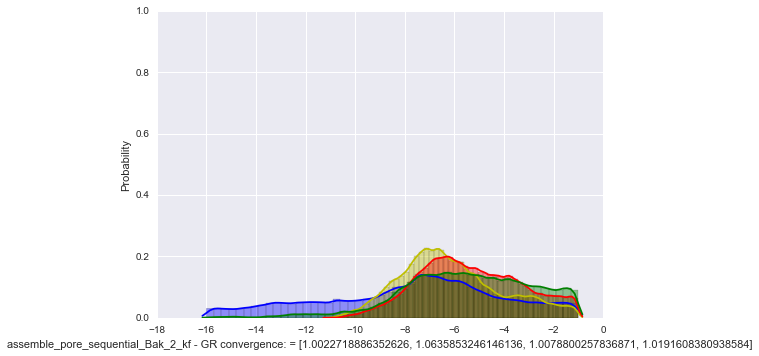

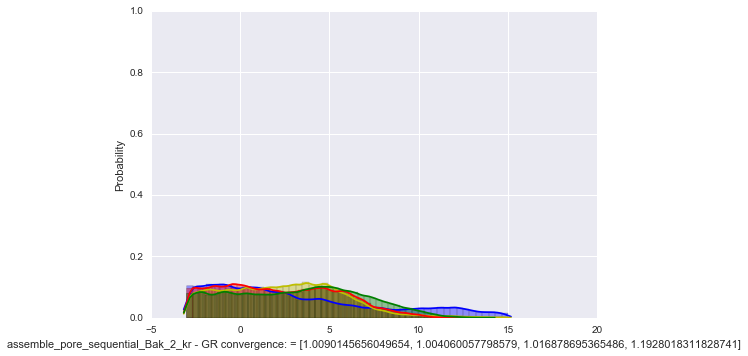

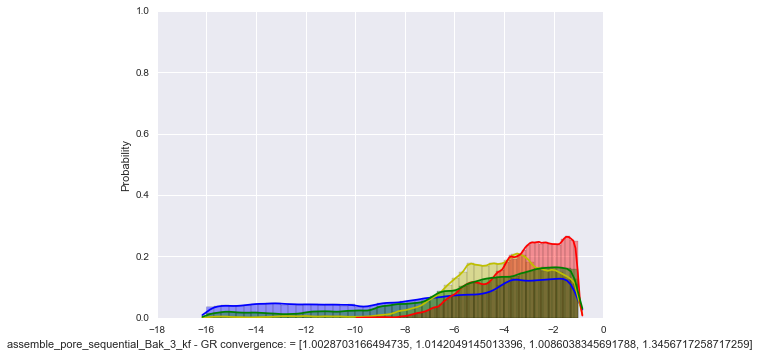

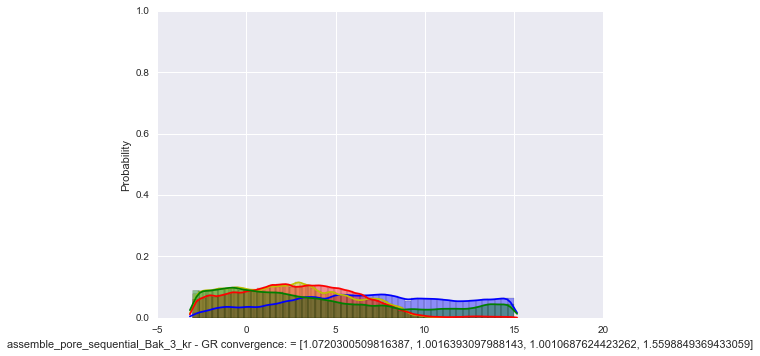

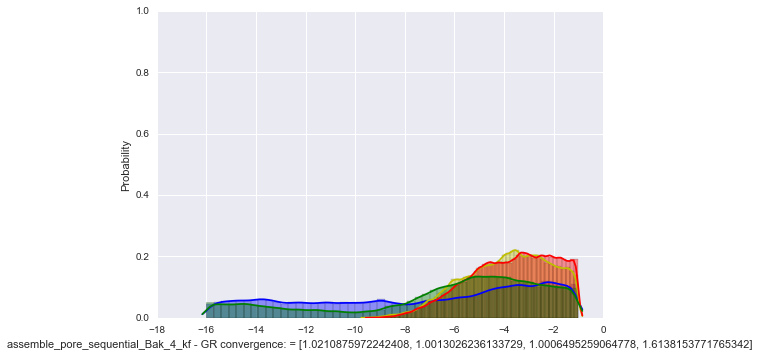

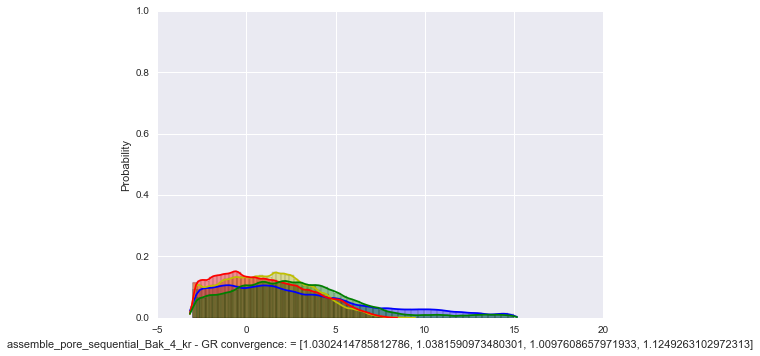

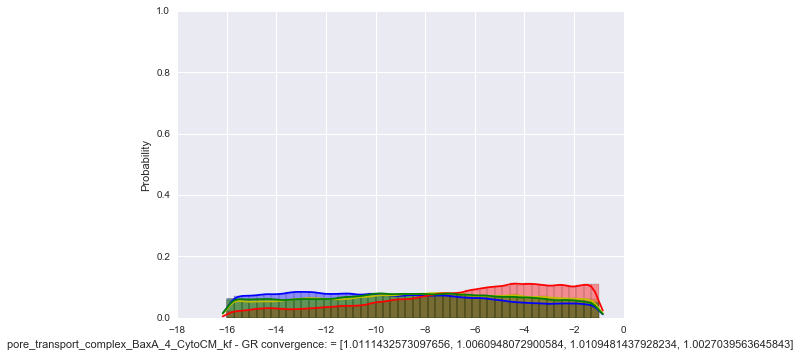

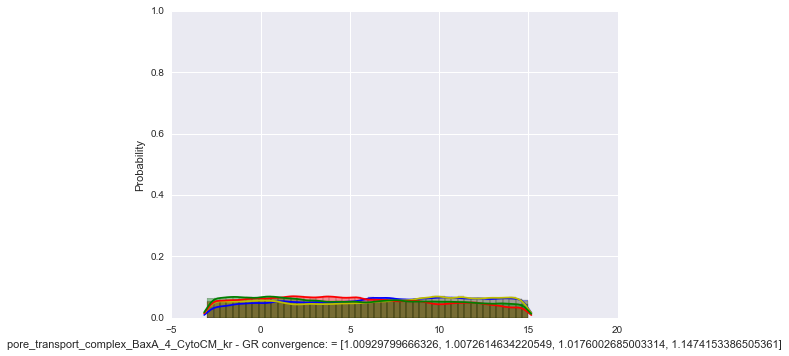

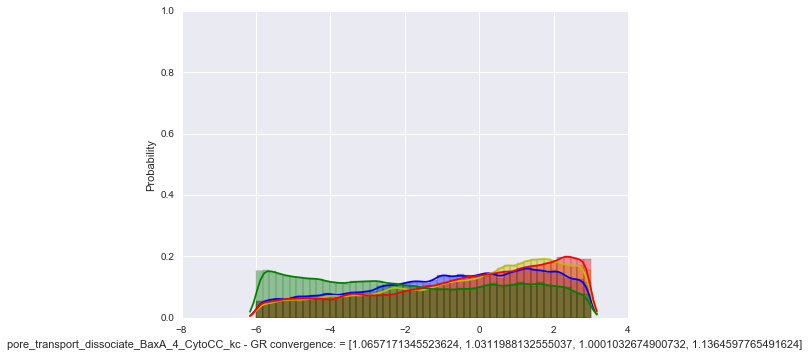

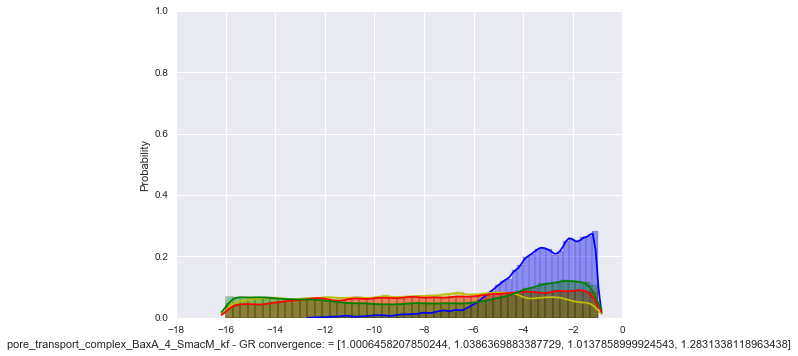

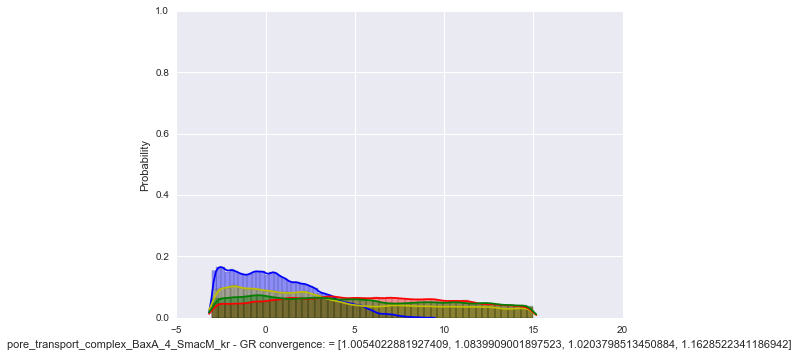

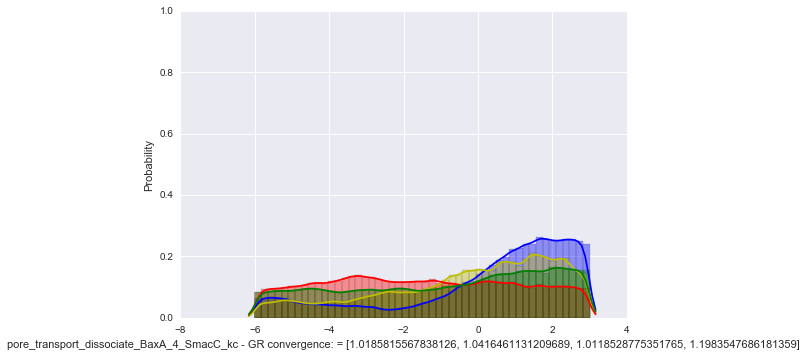

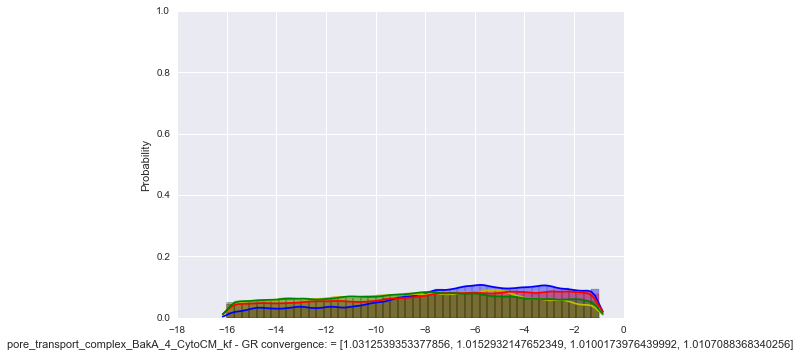

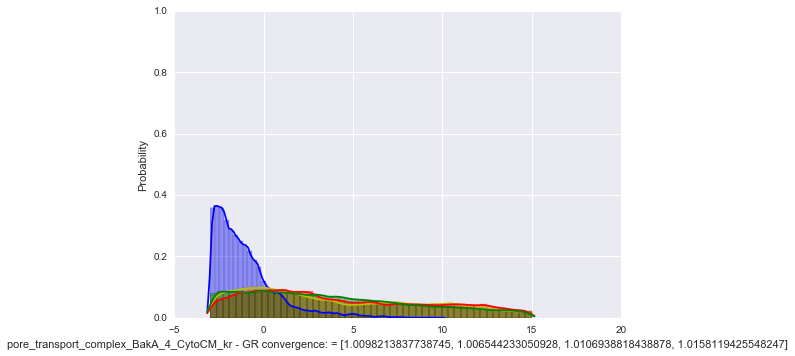

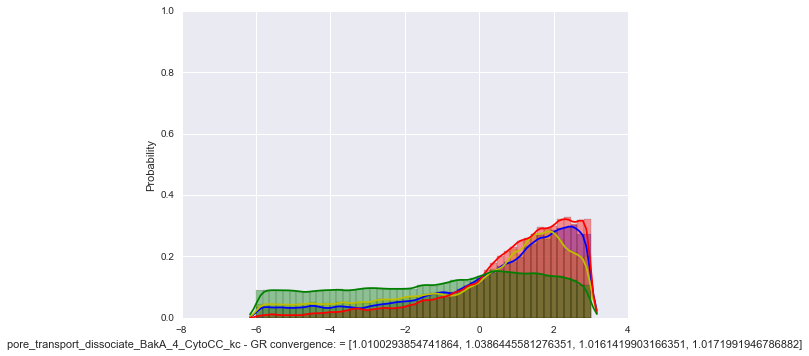

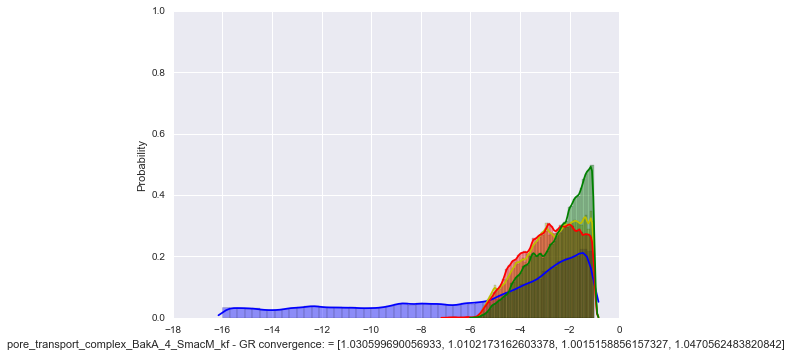

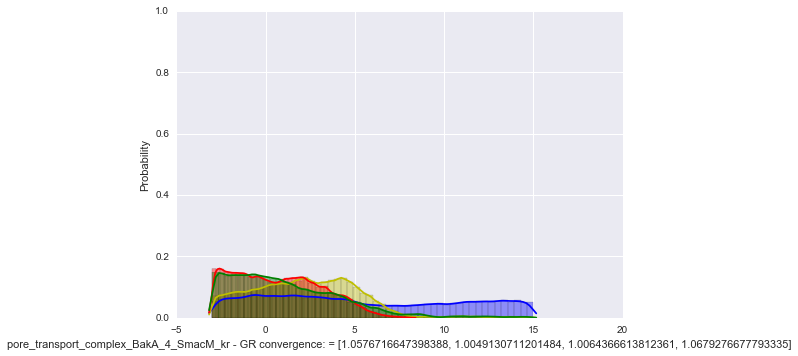

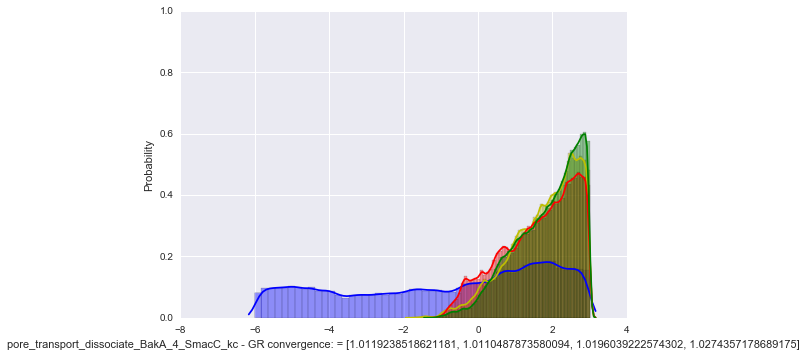

In [8]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True, color='y')
    sns.distplot(trace_arr_c[:,dim], hist=True, color='r')
    sns.distplot(trace_arr_d[:,dim], hist=True, color='g')
    if param_name in earm_rates:
        if earm_rates[param_name]['type'] == 'normal':
            plt.vlines(x=np.log10(earm_rates[param_name]['mean']), ymin=0, ymax=1, label=earm_rates[param_name]['source'])
    ax.set_ylim(0, 1.0)
    convg_summary = [gelman_rubin_dicts[trace][param_name] for trace in ['a', 'b', 'c', 'd']]
    sns.axlabel(param_name+' - GR convergence: = '+str(convg_summary), 'Probability')

In [20]:
traces['a'][1][:,1]

array([ 3.95366855,  3.95366855,  3.95366855, ..., -0.51275014,
       -0.51275014, -0.51275014])

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['c'][0][50000:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['c'][1][50000::,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['c'][2][50000:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
os.chdir('/Users/Erin/git/emcee/')
from emcee import autocorr

In [ ]:
range(1, 15+1)

In [ ]:
windows=15
integrated_autocorr_times = {}
for trace in ['a', 'b', 'c']:
    integrated_autocorr_times[trace] = {}
    for chain in range(12):
        integrated_autocorr_times[trace][chain] = np.zeros((windows, 105))
        window_length = int(len(traces[trace][chain][25000::])/windows)
        start = 25000
        for window in range(windows):
            end = start + window_length
            integrated_autocorr_times[trace][chain][window] = autocorr.integrated_time(traces[trace][chain][start:end], window=500)
            start = end
integrated_autocorr_times

In [ ]:
for trace in ['a', 'b', 'c']:
    for chain in range(3):
        for dim in range(105):
            if trace == 'a':
                plt.plot(range(15), integrated_autocorr_times[trace][chain][:,dim], 'b')
            elif trace == 'b':
                plt.plot(range(15), integrated_autocorr_times[trace][chain][:,dim], 'g')
            elif trace == 'c':
                plt.plot(range(15), integrated_autocorr_times[trace][chain][:,dim], 'y')

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [7]:
acceptance_rates = {}
vector_acceptance_rate = {}
running_acceptance_rates = {}
running_acceptance_rates_100window = {}
n_vector_acceptances = {}
n_100windowvec_acceptances = {}
running_acceptance_rates_vec = {}
running_acceptances_rates_vec_100window = {}
n_100window_acceptances = {}
n_acceptances = {}
for run in ['a', 'b', 'c', 'd']:
    acceptance_rates[run] = {}
    vector_acceptance_rate[run] = {}
    running_acceptance_rates[run] = {}
    running_acceptance_rates_100window[run] = {}
    n_vector_acceptances[run] = {}
    n_100windowvec_acceptances[run] = {}
    running_acceptance_rates_vec[run] = {}
    running_acceptances_rates_vec_100window[run] = {}
    n_100window_acceptances[run] = {}
    n_acceptances[run] = {}
    for chain in range(len(traces[run])):
        acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0],)))
        vector_acceptance_rate[run][chain] = 0
        running_acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0]), len(traces['a'][0])))
        running_acceptance_rates_100window[run][chain] = np.zeros((len(traces['a'][0][0]), 5500))
        n_vector_acceptances[run][chain] = 0
        n_100windowvec_acceptances[run][chain] = 0
        running_acceptance_rates_vec[run][chain] = np.zeros((1, len(traces['a'][0])))
        running_acceptances_rates_vec_100window[run][chain] = np.zeros((1, 5500))
        n_100window_acceptances[run][chain] = {}
        n_acceptances[run][chain] = {}
        for dim in range(len(traces[run][chain][0])):
            n_100window_acceptances[run][chain][dim] = 0
            n_acceptances[run][chain][dim] = 0
            for iteration in range(1, len(traces[run][chain])):
                if dim == 0:
                    comparison = traces[run][chain][iteration] == traces[run][chain][iteration-1]
                    if not np.all(comparison):
                        n_vector_acceptances[run][chain] += 1
                        n_100windowvec_acceptances[run][chain] += 1
                    running_acceptance_rates_vec[run][chain][0, iteration] = float(n_vector_acceptances[run][chain])/iteration
                    if iteration % 100 == 0:
                        running_acceptances_rates_vec_100window[run][chain][0, iteration/100] = float(n_100windowvec_acceptances[run][chain])/100
                        n_100windowvec_acceptances[run][chain] = 0
                if traces[run][chain][iteration][dim] != traces[run][chain][iteration-1][dim]:
                    n_acceptances[run][chain][dim] += 1
                    n_100window_acceptances[run][chain][dim] += 1
                running_acceptance_rates[run][chain][dim, iteration] = float(n_acceptances[run][chain][dim])/iteration
        
                if iteration % 100 == 0:
                    running_acceptance_rates_100window[run][chain][dim, iteration/100] = float(n_100window_acceptances[run][chain][dim])/100
                    n_100window_acceptances[run][chain][dim] = 0
            
            acceptance_rates[run][chain][dim] = float(n_acceptances[run][chain][dim])/len(traces[run][chain])
            print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances[run][chain][dim]),' acceptance rate: ',str(acceptance_rates[run][chain][dim])
        print 'n vector acceptances: ',n_vector_acceptances[run][chain],' for run: ',run,' and chain: ',chain
        print 'Acceptance rate for vector: ',float(n_vector_acceptances[run][chain])/len(traces[run][chain]),' for run: ',run,' and chain: ',chain
running_acceptance_rates
running_acceptance_rates_100window
running_acceptance_rates_vec
running_acceptances_rates_vec_100window


N acceptances for parameter:  bind_L_R_to_LR_kf  =  50491  acceptance rate:  0.0918018181818
N acceptances for parameter:  bind_L_R_to_LR_kr  =  51323  acceptance rate:  0.0933145454545
N acceptances for parameter:  convert_LR_to_DISC_kc  =  50558  acceptance rate:  0.0919236363636
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  50639  acceptance rate:  0.0920709090909
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  51532  acceptance rate:  0.0936945454545
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  50772  acceptance rate:  0.0923127272727
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  51242  acceptance rate:  0.0931672727273
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  51938  acceptance rate:  0.0944327272727
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  50115  acceptance rate:  0.0911181818182
N acceptances for parameter:  bind_DISC_flip_kf  =  51848  acceptance rate:  0.09

{'a': {0: array([[ 0.  ,  0.03,  0.26, ...,  0.05,  0.07,  0.08]]),
  1: array([[ 0.  ,  0.07,  0.41, ...,  0.04,  0.04,  0.02]]),
  2: array([[ 0.  ,  0.13,  0.22, ...,  0.14,  0.11,  0.14]])},
 'b': {0: array([[ 0.  ,  0.04,  0.23, ...,  0.09,  0.13,  0.08]]),
  1: array([[ 0.  ,  0.14,  0.29, ...,  0.  ,  0.03,  0.  ]]),
  2: array([[ 0.  ,  0.1 ,  0.27, ...,  0.04,  0.09,  0.06]])},
 'c': {0: array([[ 0.  ,  0.07,  0.22, ...,  0.06,  0.02,  0.08]]),
  1: array([[ 0.  ,  0.06,  0.24, ...,  0.16,  0.2 ,  0.16]]),
  2: array([[ 0.  ,  0.07,  0.25, ...,  0.11,  0.12,  0.1 ]])},
 'd': {0: array([[ 0.  ,  0.03,  0.19, ...,  0.15,  0.14,  0.14]]),
  1: array([[ 0.  ,  0.11,  0.24, ...,  0.13,  0.22,  0.14]]),
  2: array([[ 0.  ,  0.12,  0.16, ...,  0.1 ,  0.05,  0.04]])}}

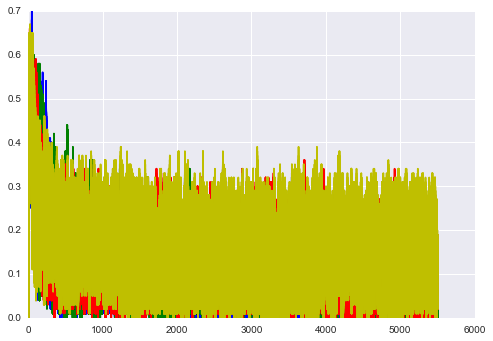

In [8]:
for run in ['a', 'b', 'c', 'd']:
    for chain in range(len(traces[run])):
        for dim in range(105):
            if run == 'a':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'b')
            elif run == 'b':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'g')
            elif run == 'c':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'r')
            elif run == 'd':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'y')

In [ ]:
adapted_crossover_vals = {}
adapted_gamma_vals = {}
joint_probs = {}
for run in ['a', 'b']:
    adapted_gamma_vals[run] = np.load('earm_mtdreamzs_12chain_uniform_gammalevels_25000burnin_'+run+'_DREAM_chain_adapted_gammalevelprob.npy')
    adapted_crossover_vals[run] = np.load('earm_mtdreamzs_12chain_uniform_gammalevels_25000burnin_'+run+'_DREAM_chain_adapted_crossoverprob.npy')
    #joint_probs[run] = adapted_crossover_vals[run]*[adapted_gamma_vals[run][level] for level in range(len(adapted_gamma_vals[run]))]


In [ ]:
adapted_crossover_vals

In [ ]:
adapted_gamma_vals